In [10]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 

In [11]:
Lambda = np.array([
[0, 2/3, 1/3, 0, 0],
[0, 0, 1/4, 1/4, 2/4],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]
])

In [12]:
eps = 1e-16
Lambda[4,4] = eps # in order to make matrix invertable
omega = Lambda@np.ones(Lambda.shape[0])
D = np.diag(omega)
P = np.linalg.inv(D)@Lambda
P

array([[0.        , 0.66666667, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.25      , 0.25      , 0.5       ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [13]:
omega_star = np.max(omega)
Q = Lambda/omega_star 
Q = Q + np.diag(np.ones(len(omega))-np.sum(Q,axis=1))

values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)

pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print('Q: ', Q)
print("pi_bar=", pi_bar)

Q:  [[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.25       0.25       0.5       ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]]
pi_bar= [0. 0. 0. 0. 1.]


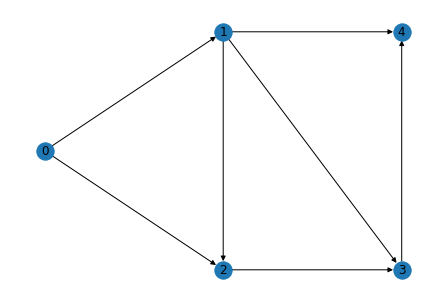

In [60]:
G = nx.DiGraph()

G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(0,1), (0, 2),  (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)])

positions = {1: (1,1), 2: (1,0), 3: (2,0), 4: (2,1), 0: (0,0.5)}

nx.draw(G, positions, with_labels=True)
# plt.savefig("graph3.eps",format='eps')

# a) proportional  rate

In [83]:
def proportional(input_rate = 1):
    time_limit = 60
    eps = 1e-16
    states = [] # store the states of nodes
    times = [] # store the times
    node_states = np.array([1, 0, 0, 0, 0]) # initialize node states as node 0 has 1 particle
    states.append(node_states.copy())
    times.append(0)
    total_time = 0 # total time passed
    total_particles = sum(node_states) # total particles inside the system
    it = 0 # iteration for statistics
    n_nodes = G.number_of_nodes() #  number of nodes
    
    while total_time<time_limit:
        it += 1
        t_nexts = list(-np.log(np.random.rand(n_nodes))/(node_states+eps)) # times for each node as a list
        inp_time = -np.log(np.random.rand())/input_rate # input time 

        mov_time = min(t_nexts) # which particle's clock ticks first 
        if inp_time< mov_time: # if input or particle ticks first, if input ticks new particle added
            total_particles+=1
            node_states[0]+=1
            total_time+=inp_time
            states.append(node_states.copy())
            times.append(total_time)
            print('Particle added: ', total_time, total_particles, node_states)

            continue # because times for node also changed they are needed to be calculated again

        # below happens if node clock ticks before input
        total_time += mov_time
        sel_node = np.argmin(t_nexts) # which node ticks

        if sel_node == 4: # if we remove particle from the tail
            total_particles -= 1
            node_states[4] -= 1

        else:
            des_node = np.random.choice(G.nodes(), p = P[sel_node, :]) # choose the destination node based on probability 

            node_states[sel_node] -=1
            node_states[des_node] +=1

        if total_particles < 0: # if there is no particle inside the system add one
            inp_time = -np.log(np.random.rand())/input_rate
            total_particles+=1
            node_states[0]+=1
            total_time+=inp_time
        states.append(node_states.copy())
        times.append(total_time)

        print(total_time, total_particles, node_states)
    
    fig, ax = plt.subplots(figsize=(20,7)) 
    for node in range(G.number_of_nodes()):
        plt.plot(times, np.array(states)[:,node], label=node)
    ax.legend()
    plt.xlabel('Time')
    plt.ylabel('Distribution of particles')
    plt.legend()
    plt.savefig("plot3prop_rate"+str(input_rate)+".eps",format='eps')

Particle added:  0.18898348114455465 2 [2 0 0 0 0]
0.4323713025206348 2 [1 1 0 0 0]
0.5278371882847543 2 [1 0 0 0 1]
0.7181253514871839 2 [0 1 0 0 1]
Particle added:  1.1365582175313151 3 [1 1 0 0 1]
1.7530825070880325 3 [1 0 1 0 1]
1.787198614370935 3 [0 0 2 0 1]
1.828587837881087 2 [0 0 2 0 0]
3.0790557768156326 2 [0 0 1 1 0]
Particle added:  3.2291200267249325 3 [1 0 1 1 0]
Particle added:  3.278774243092774 4 [2 0 1 1 0]
3.3494803200053402 4 [2 0 0 2 0]
3.4031248982542626 4 [1 0 1 2 0]
3.40786324062704 4 [0 0 2 2 0]
3.430130839513586 4 [0 0 2 1 1]
3.864952540273026 4 [0 0 1 2 1]
3.941160628693556 4 [0 0 1 1 2]
Particle added:  3.989623689769239 5 [1 0 1 1 2]
4.073974923878695 4 [1 0 1 1 1]
4.0757197663107165 4 [1 0 0 2 1]
4.151573998800599 4 [1 0 0 1 2]
4.3978296118910905 4 [1 0 0 0 3]
4.9410932225247235 4 [0 1 0 0 3]
5.746438747725839 3 [0 1 0 0 2]
5.843502275845765 2 [0 1 0 0 1]
6.181779434485321 1 [0 1 0 0 0]
Particle added:  6.618596328663047 2 [1 1 0 0 0]
Particle added:  8.22

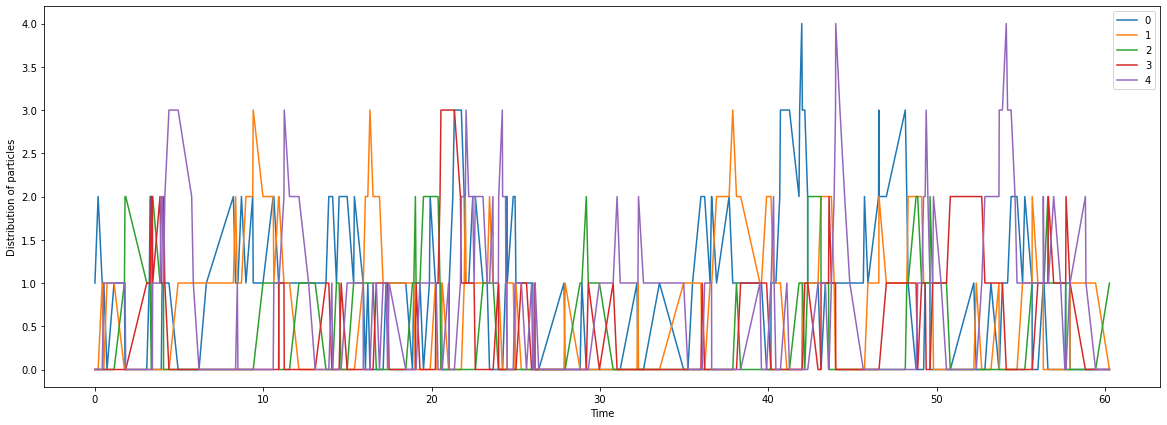

In [74]:
proportional(1)

Particle added:  0.2034957800596935 2 [2 0 0 0 0]
Particle added:  0.2247931238746322 3 [3 0 0 0 0]
Particle added:  0.22742283395168128 4 [4 0 0 0 0]
Particle added:  0.27226433906329284 5 [5 0 0 0 0]
0.3407898542829679 5 [4 1 0 0 0]
Particle added:  0.3528195715962224 6 [5 1 0 0 0]
Particle added:  0.43496224242961234 7 [6 1 0 0 0]
0.5374447309926514 7 [5 2 0 0 0]
Particle added:  0.5835448892797818 8 [6 2 0 0 0]
0.6092232786715892 8 [6 1 0 0 1]
Particle added:  0.6443251177271974 9 [7 1 0 0 1]
Particle added:  0.6815558168820877 10 [8 1 0 0 1]
Particle added:  0.7344561417896703 11 [9 1 0 0 1]
Particle added:  0.7792876262041714 12 [10  1  0  0  1]
Particle added:  0.7853541711694938 13 [11  1  0  0  1]
0.7875476740061802 13 [10  2  0  0  1]
0.8182019132250433 13 [10  1  0  1  1]
Particle added:  0.8220121382404912 14 [11  1  0  1  1]
0.918250085250797 14 [10  2  0  1  1]
0.920433994687201 13 [10  2  0  1  0]
Particle added:  0.9330139701068169 14 [11  2  0  1  0]
0.9411781584117328

Particle added:  6.893118772262303 37 [12  6  5  8  6]
Particle added:  6.893138443720135 38 [13  6  5  8  6]
Particle added:  6.9014235777063195 39 [14  6  5  8  6]
6.910088301983142 39 [14  6  5  7  7]
6.9451094468379795 38 [14  6  5  7  6]
6.953390815518173 37 [14  6  5  7  5]
6.988967044593219 37 [13  7  5  7  5]
Particle added:  6.991523324270856 38 [14  7  5  7  5]
7.001986317680572 38 [14  6  5  7  6]
7.019325883135916 38 [14  6  5  6  7]
7.038752530115537 38 [14  6  4  7  7]
7.04241676952702 38 [14  5  5  7  7]
Particle added:  7.066157650801218 39 [15  5  5  7  7]
7.07010645615197 38 [15  5  5  7  6]
7.105202923361041 38 [15  5  4  8  6]
7.134383270785032 38 [14  6  4  8  6]
7.213137947830686 38 [13  7  4  8  6]
7.22516797613101 38 [13  6  4  8  7]
7.299182110943793 37 [13  6  4  8  6]
7.313966629809444 37 [12  7  4  8  6]
7.314414569844278 37 [12  7  4  7  7]
7.317069659251042 37 [11  8  4  7  7]
7.342266642047389 37 [11  7  4  8  7]
7.350310986623905 37 [10  8  4  8  7]
Part

11.90442270525232 36 [ 8  6  4 10  8]
11.911370769183915 36 [8 6 4 9 9]
11.912172414095911 36 [7 7 4 9 9]
Particle added:  11.916986695931193 37 [8 7 4 9 9]
Particle added:  11.917386118808789 38 [9 7 4 9 9]
11.944382955102471 38 [8 8 4 9 9]
11.944835584917165 37 [8 8 4 9 8]
11.95187327379068 37 [ 8  8  3 10  8]
11.960368259626012 37 [ 7  8  4 10  8]
11.976534672757019 37 [ 7  7  4 11  8]
Particle added:  11.978588396439473 38 [ 8  7  4 11  8]
12.025915958346665 38 [ 7  7  5 11  8]
12.05365836293288 38 [ 6  7  6 11  8]
12.08746963874003 38 [ 6  7  6 10  9]
12.08967219193392 38 [ 6  7  6  9 10]
12.108444536357185 38 [ 6  7  5 10 10]
12.128062850848062 38 [ 5  8  5 10 10]
12.176809319993756 38 [ 5  7  6 10 10]
12.205734085433452 38 [ 5  7  6  9 11]
12.215211056409606 38 [ 5  6  6  9 12]
12.217084427276006 38 [ 5  5  7  9 12]
12.240755040096095 38 [ 5  5  6 10 12]
Particle added:  12.246416908878643 39 [ 6  5  6 10 12]
12.253137741923409 39 [ 5  5  7 10 12]
12.293851860055998 39 [ 5  4  7

18.83101663907285 33 [7 6 5 9 6]
18.85213957418981 33 [7 6 5 8 7]
18.88644430853499 33 [6 7 5 8 7]
18.897867114034074 33 [6 7 5 7 8]
Particle added:  18.949014193145043 34 [7 7 5 7 8]
18.954923424812133 33 [7 7 5 7 7]
18.954931455144173 32 [7 7 5 7 6]
18.99891751468088 31 [7 7 5 7 5]
19.033025158750636 31 [7 7 5 6 6]
19.05202717843449 30 [7 7 5 6 5]
19.091787221105783 30 [7 6 6 6 5]
Particle added:  19.160533345557244 31 [8 6 6 6 5]
19.197481740764502 31 [8 6 6 5 6]
19.21911797463979 31 [8 5 6 6 6]
19.221716487116275 30 [8 5 6 6 5]
19.225177671478086 30 [7 5 7 6 5]
19.24881361505476 30 [7 5 7 5 6]
19.375002318045507 30 [7 5 6 6 6]
19.399044913379328 30 [7 5 5 7 6]
19.42123956631778 30 [7 5 4 8 6]
19.426869094184493 30 [7 5 4 7 7]
Particle added:  19.427567827523063 31 [8 5 4 7 7]
19.429977351979822 31 [8 5 3 8 7]
19.470657126872364 31 [8 4 3 8 8]
Particle added:  19.487682992565677 32 [9 4 3 8 8]
19.53400263697695 32 [9 4 3 7 9]
19.58643373081731 32 [9 4 2 8 9]
19.62571222632862 31 [9 

25.579375461226626 33 [10  4  7  7  5]
Particle added:  25.58103334805453 34 [11  4  7  7  5]
25.592347041798984 34 [10  5  7  7  5]
Particle added:  25.60204543044526 35 [11  5  7  7  5]
25.62349044516578 35 [11  5  6  8  5]
25.638718558017814 35 [11  5  6  7  6]
25.64648465338601 35 [10  6  6  7  6]
25.694996764042227 35 [9 7 6 7 6]
25.69993929277523 35 [8 8 6 7 6]
25.710622610144963 35 [8 8 5 8 6]
25.730110652120544 35 [8 8 4 9 6]
Particle added:  25.73139274465418 36 [9 8 4 9 6]
25.75480437159064 36 [9 8 4 8 7]
25.7974449551862 36 [9 7 4 8 8]
25.8148092175563 36 [9 7 3 9 8]
25.921129431849184 36 [8 8 3 9 8]
Particle added:  25.92666834076546 37 [9 8 3 9 8]
25.93412873258022 36 [9 8 3 9 7]
25.935712154550487 36 [9 8 3 8 8]
25.96994312096673 36 [9 7 3 8 9]
25.998309913281645 35 [9 7 3 8 8]
26.035684921432807 34 [9 7 3 8 7]
26.06351318305352 34 [8 8 3 8 7]
26.099431000115267 34 [7 9 3 8 7]
26.13354903871681 34 [7 8 3 8 8]
26.147181286427205 34 [7 7 4 8 8]
Particle added:  26.149122530

30.002458483876303 34 [ 9  5  5  5 10]
30.010165045893423 34 [ 8  6  5  5 10]
Particle added:  30.010624099683127 35 [ 9  6  5  5 10]
Particle added:  30.028654087505224 36 [10  6  5  5 10]
30.042396838202922 36 [ 9  7  5  5 10]
30.05994137177074 36 [ 8  8  5  5 10]
Particle added:  30.071270879099067 37 [ 9  8  5  5 10]
30.075208304127138 36 [9 8 5 5 9]
30.11100293678604 36 [9 7 6 5 9]
30.148389409674177 36 [ 9  7  6  4 10]
30.148548203722648 36 [ 8  7  7  4 10]
30.186165381123338 36 [ 8  7  7  3 11]
30.21839389028936 35 [ 8  7  7  3 10]
30.21909062323255 35 [ 8  7  7  2 11]
30.230865829383916 34 [ 8  7  7  2 10]
30.23500568764758 34 [ 8  6  7  2 11]
30.251792811470555 34 [ 7  7  7  2 11]
30.270812132697994 34 [ 7  7  6  3 11]
30.308657992126868 33 [ 7  7  6  3 10]
30.322948821177473 33 [ 7  7  6  2 11]
30.380737543356993 32 [ 7  7  6  2 10]
30.381882304710604 32 [ 7  7  6  1 11]
30.393487130410204 32 [ 7  6  6  1 12]
Particle added:  30.419401621546633 33 [ 8  6  6  1 12]
30.41979462

35.31781370064109 37 [ 5  9  4  6 13]
Particle added:  35.35259136226864 38 [ 6  9  4  6 13]
35.37829417381056 38 [ 6  9  4  5 14]
35.4229916168336 37 [ 6  9  4  5 13]
35.42475210693977 36 [ 6  9  4  5 12]
35.42709010397282 36 [ 5 10  4  5 12]
Particle added:  35.44434859409198 37 [ 6 10  4  5 12]
35.44778773621047 36 [ 6 10  4  5 11]
35.45148531601412 36 [ 5 11  4  5 11]
35.47011396544311 36 [ 5 11  4  4 12]
35.47215831915702 35 [ 5 11  4  4 11]
Particle added:  35.487904146261535 36 [ 6 11  4  4 11]
35.63477415109315 36 [ 6 11  4  3 12]
35.67416764180442 35 [ 6 11  4  3 11]
35.68899181133225 35 [ 6 11  4  2 12]
35.6905471354267 34 [ 6 11  4  2 11]
Particle added:  35.72372942104392 35 [ 7 11  4  2 11]
35.73534276224461 35 [ 7 11  3  3 11]
35.74613384167654 34 [ 7 11  3  3 10]
35.77112051541308 33 [ 7 11  3  3  9]
35.78332549996583 33 [ 7 11  2  4  9]
35.7942490331806 32 [ 7 11  2  4  8]
Particle added:  35.83184517499106 33 [ 8 11  2  4  8]
35.93414447860672 32 [ 8 11  2  4  7]
35.94

41.406364425307025 39 [10  6  5  5 13]
41.463239986762744 38 [10  6  5  5 12]
41.474530229014356 38 [10  5  5  6 12]
41.48754414410996 38 [ 9  6  5  6 12]
41.49642183522649 38 [ 9  6  5  5 13]
41.49702558794299 38 [ 9  5  6  5 13]
41.50103941213101 37 [ 9  5  6  5 12]
41.52658546302314 37 [ 9  4  6  6 12]
41.554781925506816 36 [ 9  4  6  6 11]
Particle added:  41.578811627483965 37 [10  4  6  6 11]
41.60254920536318 37 [10  4  6  5 12]
41.608792215062174 37 [ 9  5  6  5 12]
41.61250282000029 37 [ 9  5  6  4 13]
41.664223815383146 37 [ 9  4  7  4 13]
Particle added:  41.67841123151806 38 [10  4  7  4 13]
41.68598214378675 38 [ 9  4  8  4 13]
Particle added:  41.705933452339906 39 [10  4  8  4 13]
41.70743421480782 39 [10  3  8  4 14]
41.713462142829414 38 [10  3  8  4 13]
41.76981650862556 38 [ 9  4  8  4 13]
41.788765194388255 37 [ 9  4  8  4 12]
41.79524153102325 37 [ 8  5  8  4 12]
Particle added:  41.824730510088955 38 [ 9  5  8  4 12]
41.86757690741008 37 [ 9  5  8  4 11]
41.872222

46.711395371657055 40 [ 5 15  8  5  7]
46.714553001998254 40 [ 4 15  9  5  7]
46.731492940037924 39 [ 4 15  9  5  6]
46.73150346681635 39 [ 4 15  8  6  6]
46.77032037821409 38 [ 4 15  8  6  5]
46.772128601706434 37 [ 4 15  8  6  4]
46.80982733521168 37 [ 4 14  9  6  4]
46.82504750624756 37 [ 4 13  9  6  5]
46.82582512955647 37 [ 4 13  8  7  5]
Particle added:  46.83651308031911 38 [ 5 13  8  7  5]
Particle added:  46.88151695080711 39 [ 6 13  8  7  5]
Particle added:  46.89154322770799 40 [ 7 13  8  7  5]
46.925128004050556 40 [ 7 12  8  7  6]
46.932167189269485 40 [ 6 12  9  7  6]
46.94776460495013 40 [ 6 11 10  7  6]
Particle added:  46.98984138327986 41 [ 7 11 10  7  6]
46.99490335263927 41 [ 6 11 11  7  6]
47.03903040381339 41 [ 6 11 11  6  7]
47.05604087214658 41 [ 6 11 11  5  8]
47.06119050099717 40 [ 6 11 11  5  7]
47.06704219802431 40 [ 6 11 10  6  7]
Particle added:  47.132934981972056 41 [ 7 11 10  6  7]
47.155490363013826 41 [ 7 11 10  5  8]
47.18251421434928 41 [ 6 12 10  5

Particle added:  52.82630463525279 34 [10  4  4  4 12]
Particle added:  52.835844832678326 35 [11  4  4  4 12]
52.86137073910683 35 [11  3  5  4 12]
Particle added:  52.86225318130409 36 [12  3  5  4 12]
52.86738142987241 35 [12  3  5  4 11]
52.9279135833409 35 [11  4  5  4 11]
Particle added:  52.950592215344344 36 [12  4  5  4 11]
52.96089587262444 36 [11  5  5  4 11]
52.971870030960794 35 [11  5  5  4 10]
Particle added:  53.04547563405958 36 [12  5  5  4 10]
53.06626164853482 35 [12  5  5  4  9]
53.07609147516189 35 [11  5  6  4  9]
53.0943598966134 35 [11  5  5  5  9]
Particle added:  53.114798181875884 36 [12  5  5  5  9]
53.163721801194704 36 [12  4  5  6  9]
53.172220325240396 36 [11  5  5  6  9]
53.19148681837059 36 [11  5  4  7  9]
53.19784758913195 36 [11  4  4  7 10]
53.22612696274014 35 [11  4  4  7  9]
53.24842539592395 34 [11  4  4  7  8]
53.24966735815469 33 [11  4  4  7  7]
53.28537747531596 33 [11  4  3  8  7]
53.30009535968516 32 [11  4  3  8  6]
53.333603143615754 3

58.40600976108048 46 [ 8  7  8  8 15]
58.415982334378214 46 [ 8  6  8  8 16]
58.42346687153476 46 [ 8  6  7  9 16]
Particle added:  58.425624270319176 47 [ 9  6  7  9 16]
Particle added:  58.438969561891874 48 [10  6  7  9 16]
58.45134339793733 48 [10  6  6 10 16]
Particle added:  58.47447506164598 49 [11  6  6 10 16]
58.48494629390361 49 [11  5  6 10 17]
Particle added:  58.53631153608038 50 [12  5  6 10 17]
58.53747130886051 50 [11  6  6 10 17]
58.54423475423361 50 [11  5  6 10 18]
58.59249739446068 50 [10  5  7 10 18]
58.60662010446784 49 [10  5  7 10 17]
58.675121962450575 48 [10  5  7 10 16]
58.676811725749204 48 [ 9  6  7 10 16]
58.683101807012505 48 [ 9  5  7 10 17]
Particle added:  58.73692963904204 49 [10  5  7 10 17]
58.75278330050776 49 [10  5  7  9 18]
58.76310846826471 48 [10  5  7  9 17]
58.78522862748255 47 [10  5  7  9 16]
58.785511445038004 46 [10  5  7  9 15]
58.80262956206805 46 [ 9  6  7  9 15]
58.80267637862458 46 [ 9  6  6 10 15]
58.82357910738934 45 [ 9  6  6 10 

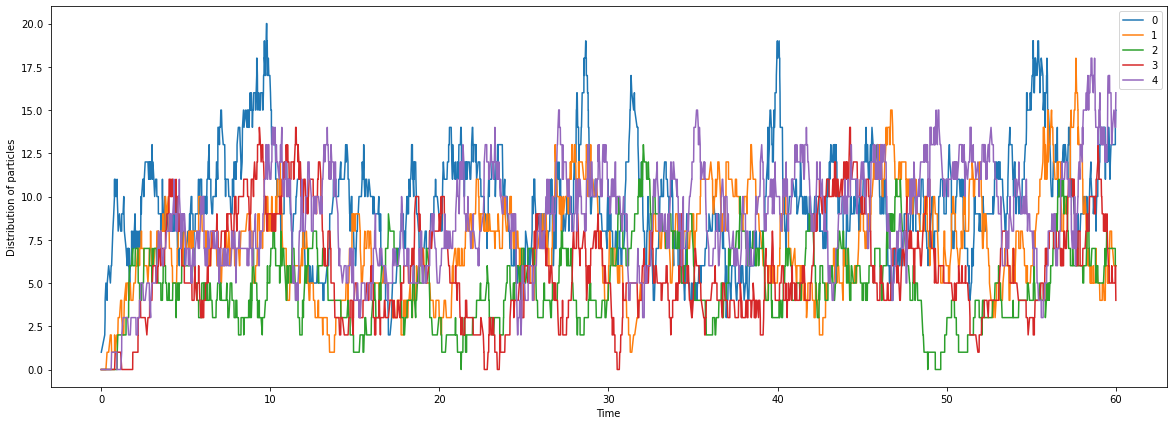

In [81]:
proportional(10)

Particle added:  0.0007352848686355845 2 [2 0 0 0 0]
Particle added:  0.005970510062873428 3 [3 0 0 0 0]
Particle added:  0.010588304009036738 4 [4 0 0 0 0]
Particle added:  0.013897616381317767 5 [5 0 0 0 0]
Particle added:  0.016408470682600686 6 [6 0 0 0 0]
Particle added:  0.019983303939875775 7 [7 0 0 0 0]
Particle added:  0.03238094408766591 8 [8 0 0 0 0]
Particle added:  0.03727742054885773 9 [9 0 0 0 0]
0.048158188461159095 9 [8 0 1 0 0]
Particle added:  0.05033206691966237 10 [9 0 1 0 0]
0.05172835000851096 10 [8 1 1 0 0]
Particle added:  0.08634023566764101 11 [9 1 1 0 0]
Particle added:  0.08915561180247689 12 [10  1  1  0  0]
Particle added:  0.09166006780692355 13 [11  1  1  0  0]
Particle added:  0.09195917372367504 14 [12  1  1  0  0]
Particle added:  0.09301407649671496 15 [13  1  1  0  0]
Particle added:  0.10907694861603784 16 [14  1  1  0  0]
Particle added:  0.11264267606525094 17 [15  1  1  0  0]
Particle added:  0.1164173189493695 18 [16  1  1  0  0]
0.12006497064

Particle added:  1.7663391348854467 162 [81 29 15 18 19]
1.7665921821101793 162 [81 29 14 19 19]
1.767309529556477 162 [80 30 14 19 19]
1.7686742865672516 161 [80 30 14 19 18]
1.7731410850128664 161 [79 30 15 19 18]
1.781873840171088 161 [78 30 16 19 18]
1.7823424705097037 161 [78 29 17 19 18]
Particle added:  1.7914908933095224 162 [79 29 17 19 18]
Particle added:  1.7937645426680167 163 [80 29 17 19 18]
1.795072365367357 163 [80 28 17 20 18]
Particle added:  1.795708227336986 164 [81 28 17 20 18]
Particle added:  1.8007539658912863 165 [82 28 17 20 18]
Particle added:  1.8013417269141812 166 [83 28 17 20 18]
1.8057201626428994 166 [83 28 16 21 18]
1.8057865743564543 166 [82 29 16 21 18]
Particle added:  1.8072651255336938 167 [83 29 16 21 18]
Particle added:  1.8152116663321478 168 [84 29 16 21 18]
Particle added:  1.8181974370487424 169 [85 29 16 21 18]
1.81866383646919 169 [85 29 15 22 18]
1.8188835654388646 169 [84 29 16 22 18]
1.8218182534136362 169 [84 29 15 23 18]
Particle adde

Particle added:  2.6797222911409584 241 [103  41  30  29  38]
2.682470546412352 241 [103  41  29  30  38]
2.6851828349680287 241 [103  40  29  30  39]
2.686329592268709 241 [102  41  29  30  39]
2.689391953056527 241 [101  42  29  30  39]
2.6899262798501757 240 [101  42  29  30  38]
2.6910958602048436 240 [101  41  29  31  38]
Particle added:  2.691346330414374 241 [102  41  29  31  38]
Particle added:  2.6921438577049783 242 [103  41  29  31  38]
Particle added:  2.693257991370736 243 [104  41  29  31  38]
Particle added:  2.695665834211346 244 [105  41  29  31  38]
2.6975016138048344 244 [104  41  30  31  38]
Particle added:  2.698094798761601 245 [105  41  30  31  38]
2.698714087501697 245 [105  41  29  32  38]
Particle added:  2.7009510196201547 246 [106  41  29  32  38]
Particle added:  2.702641053573769 247 [107  41  29  32  38]
2.7061054401287885 247 [107  40  30  32  38]
Particle added:  2.7150155429924276 248 [108  40  30  32  38]
Particle added:  2.718548114624802 249 [109  4

3.4702267863963847 301 [107  61  41  35  57]
3.4707355396318516 301 [107  61  40  36  57]
3.4715803854839655 300 [107  61  40  36  56]
Particle added:  3.4763266205725736 301 [108  61  40  36  56]
3.483040372324758 301 [107  62  40  36  56]
3.483552981672758 300 [107  62  40  36  55]
3.485093697698705 299 [107  62  40  36  54]
3.4855018865392324 299 [106  63  40  36  54]
Particle added:  3.4888879870700835 300 [107  63  40  36  54]
3.497822292622275 300 [107  63  39  37  54]
3.5000865892326534 300 [107  63  39  36  55]
3.5019644294864594 300 [106  63  40  36  55]
3.505257663908975 299 [106  63  40  36  54]
Particle added:  3.506740336767318 300 [107  63  40  36  54]
3.5068641413421733 300 [107  62  41  36  54]
3.5088236950310066 300 [106  63  41  36  54]
3.5124322045738356 300 [106  63  40  37  54]
3.513039189489264 300 [105  64  40  37  54]
3.5132809346385927 300 [104  64  41  37  54]
3.5145602588628693 300 [103  65  41  37  54]
3.5217551139771426 300 [102  66  41  37  54]
3.521826104

4.233072818811291 330 [104  73  47  40  66]
Particle added:  4.233708535689348 331 [105  73  47  40  66]
Particle added:  4.236451470335561 332 [106  73  47  40  66]
4.238463461749833 332 [105  73  48  40  66]
4.238733084429315 332 [105  73  47  41  66]
4.239135801435747 332 [105  73  46  42  66]
4.2416519870043405 332 [104  74  46  42  66]
4.2421497939819925 332 [103  75  46  42  66]
4.24448874513986 332 [103  74  47  42  66]
4.2454552696106 332 [103  74  47  41  67]
4.256286887303227 331 [103  74  47  41  66]
4.2565167105186985 330 [103  74  47  41  65]
Particle added:  4.257701704854824 331 [104  74  47  41  65]
4.258828134238363 331 [103  75  47  41  65]
Particle added:  4.259196796348315 332 [104  75  47  41  65]
4.261821084188867 332 [104  75  47  40  66]
Particle added:  4.2628213220939415 333 [105  75  47  40  66]
4.269499027989212 332 [105  75  47  40  65]
Particle added:  4.27231249917176 333 [106  75  47  40  65]
4.2736529352202774 332 [106  75  47  40  64]
Particle added:  

4.87926688428805 331 [105  70  48  42  66]
Particle added:  4.879501842717075 332 [106  70  48  42  66]
4.88459172747632 332 [106  70  48  41  67]
4.8871624212196005 332 [105  70  49  41  67]
Particle added:  4.888579758469884 333 [106  70  49  41  67]
Particle added:  4.89019092318475 334 [107  70  49  41  67]
4.8928487332083 334 [106  70  50  41  67]
Particle added:  4.893616780709874 335 [107  70  50  41  67]
4.893649265127944 335 [106  71  50  41  67]
4.894469843263462 335 [105  71  51  41  67]
4.895683335227275 334 [105  71  51  41  66]
4.897487038659144 334 [104  72  51  41  66]
4.900130807617152 334 [104  72  51  40  67]
Particle added:  4.9005396290682794 335 [105  72  51  40  67]
4.900748499833623 335 [105  71  51  40  68]
4.900799001183345 334 [105  71  51  40  67]
4.901778916264796 334 [105  71  50  41  67]
Particle added:  4.903306436184156 335 [106  71  50  41  67]
Particle added:  4.905134943671681 336 [107  71  50  41  67]
4.91365597432857 336 [107  70  50  41  68]
4.913

5.5894456486279225 349 [97 73 43 59 77]
5.592883379471259 349 [97 73 43 58 78]
5.59662331506555 349 [97 72 43 58 79]
5.599163568882561 349 [97 71 44 58 79]
5.600842578129365 349 [97 71 43 59 79]
5.600903468792026 348 [97 71 43 59 78]
5.6009625059007275 348 [97 71 42 60 78]
Particle added:  5.604648845061831 349 [98 71 42 60 78]
5.605243655891992 349 [98 71 41 61 78]
Particle added:  5.611599177423778 350 [99 71 41 61 78]
5.617756912674113 349 [99 71 41 61 77]
5.622664807249903 349 [99 70 42 61 77]
5.624200278935485 349 [98 71 42 61 77]
Particle added:  5.625364727905882 350 [99 71 42 61 77]
Particle added:  5.625545794294089 351 [100  71  42  61  77]
5.626564053123895 351 [100  70  42  62  77]
5.628956228979649 351 [99 70 43 62 77]
5.62935145579391 351 [99 70 43 61 78]
5.631645191027219 351 [99 70 43 60 79]
5.632199984151167 351 [99 69 44 60 79]
5.63459848442716 351 [98 69 45 60 79]
5.63489684317926 351 [98 68 45 60 80]
Particle added:  5.645198419419281 352 [99 68 45 60 80]
Particle a

6.191130793073339 354 [97 57 53 62 85]
6.193848429274398 353 [97 57 53 62 84]
6.19385784898074 353 [97 57 52 63 84]
6.19413928196214 352 [97 57 52 63 83]
6.1953254543453795 352 [96 58 52 63 83]
6.196265552466499 352 [95 59 52 63 83]
6.198128378455128 352 [94 59 53 63 83]
6.202529461004108 351 [94 59 53 63 82]
Particle added:  6.203371424209994 352 [95 59 53 63 82]
6.205121317696967 351 [95 59 53 63 81]
6.2063487113334075 351 [95 58 53 63 82]
6.208513573505379 351 [95 57 53 63 83]
6.2108332867737115 350 [95 57 53 63 82]
6.211667340893419 349 [95 57 53 63 81]
6.211857659107135 349 [95 57 52 64 81]
Particle added:  6.215511315393845 350 [96 57 52 64 81]
6.2158385348992695 350 [95 57 53 64 81]
6.21699410954639 350 [94 58 53 64 81]
Particle added:  6.218141371371079 351 [95 58 53 64 81]
6.223302817027318 351 [95 58 53 63 82]
6.224103335146285 351 [94 59 53 63 82]
6.224502872584001 351 [94 58 54 63 82]
Particle added:  6.225001101797017 352 [95 58 54 63 82]
6.225292234194098 352 [94 59 54 63

6.802358685922583 364 [100  67  51  62  84]
6.803954655705155 363 [100  67  51  62  83]
6.806050054426228 363 [100  67  51  61  84]
6.806783409371693 363 [100  67  51  60  85]
6.808365556664016 363 [100  67  50  61  85]
6.809499132939951 363 [100  66  50  62  85]
6.8108991437638435 363 [100  65  50  63  85]
6.8114759774029325 363 [100  64  50  63  86]
6.812116408875246 363 [99 65 50 63 86]
6.813642110351247 362 [99 65 50 63 85]
Particle added:  6.8163283358985485 363 [100  65  50  63  85]
Particle added:  6.819615929516196 364 [101  65  50  63  85]
6.8269791816785395 363 [101  65  50  63  84]
6.827013844421438 362 [101  65  50  63  83]
Particle added:  6.830892060765116 363 [102  65  50  63  83]
6.831775812209648 362 [102  65  50  63  82]
6.83667625573976 362 [101  66  50  63  82]
6.837643744697848 361 [101  66  50  63  81]
6.840742136024672 361 [100  67  50  63  81]
6.841513567586568 361 [100  67  50  62  82]
6.843539368203133 360 [100  67  50  62  81]
6.843912355790189 360 [100  66  

7.438569831108957 366 [98 72 44 76 76]
7.438971075123868 366 [98 71 44 77 76]
7.445477595429029 366 [98 70 44 78 76]
7.446691645571247 366 [98 69 45 78 76]
7.4471086306259595 366 [98 69 44 79 76]
7.450641499949584 365 [98 69 44 79 75]
7.450882867496052 365 [98 69 43 80 75]
7.453333265854981 364 [98 69 43 80 74]
7.45389823657065 364 [98 69 42 81 74]
7.456637106832649 364 [97 70 42 81 74]
7.460574888554962 364 [96 70 43 81 74]
7.463781041111564 364 [96 70 42 82 74]
7.46746666332291 364 [96 69 42 82 75]
Particle added:  7.474275092818829 365 [97 69 42 82 75]
7.478349984062418 365 [97 68 42 83 75]
7.480270433064883 364 [97 68 42 83 74]
Particle added:  7.481226168250074 365 [98 68 42 83 74]
7.481538481189586 365 [98 68 41 84 74]
7.483910546593906 365 [98 68 41 83 75]
7.485962974327595 365 [98 67 41 83 76]
7.486147523355273 365 [98 67 41 82 77]
7.490020970930436 365 [98 67 41 81 78]
7.492712107413836 365 [98 66 41 82 78]
7.493285278512534 365 [97 67 41 82 78]
Particle added:  7.494131375237

Particle added:  8.012124417430664 368 [102  57  43  74  92]
8.015785683957219 367 [102  57  43  74  91]
8.019427165947377 367 [101  58  43  74  91]
8.021937212092276 366 [101  58  43  74  90]
Particle added:  8.022912103310059 367 [102  58  43  74  90]
8.025027485713633 367 [101  59  43  74  90]
8.026184324578374 367 [100  60  43  74  90]
Particle added:  8.027728411791927 368 [101  60  43  74  90]
Particle added:  8.02785544646953 369 [102  60  43  74  90]
8.032227721251225 368 [102  60  43  74  89]
8.03524073464416 368 [102  60  42  75  89]
8.035707811156634 368 [102  59  42  75  90]
8.037696570444059 368 [102  59  42  74  91]
8.037727346719127 368 [102  58  43  74  91]
8.038821051267222 367 [102  58  43  74  90]
8.043594636185464 367 [101  59  43  74  90]
8.043835394624885 366 [101  59  43  74  89]
8.048221419702196 366 [101  58  43  75  89]
8.05202542101596 366 [100  59  43  75  89]
8.052498274869961 366 [100  59  43  74  90]
8.055983206154682 365 [100  59  43  74  89]
8.056420804

8.622264456231376 358 [98 63 44 73 80]
Particle added:  8.62448567374773 359 [99 63 44 73 80]
8.625214805800839 359 [98 63 45 73 80]
Particle added:  8.628598884493405 360 [99 63 45 73 80]
Particle added:  8.628703981914587 361 [100  63  45  73  80]
8.631360161699497 361 [99 63 46 73 80]
Particle added:  8.634849701114316 362 [100  63  46  73  80]
8.635391634217923 361 [100  63  46  73  79]
8.636631750051189 360 [100  63  46  73  78]
8.638845069281667 359 [100  63  46  73  77]
8.642440721354323 359 [100  62  46  73  78]
Particle added:  8.643436673948889 360 [101  62  46  73  78]
8.64547975118425 360 [101  62  46  72  79]
8.650352435081276 360 [101  62  46  71  80]
Particle added:  8.650619580517764 361 [102  62  46  71  80]
8.653659372937902 361 [102  61  47  71  80]
Particle added:  8.655922034055013 362 [103  61  47  71  80]
8.662857981174742 362 [103  60  48  71  80]
8.66446888332703 362 [102  60  49  71  80]
8.667264840516857 362 [102  60  49  70  81]
8.668108737399345 361 [102  6

9.18668779225513 359 [107  56  38  83  75]
Particle added:  9.188626435097792 360 [108  56  38  83  75]
9.192719907464726 359 [108  56  38  83  74]
9.193012422450263 359 [108  55  38  83  75]
9.194325532807905 359 [107  56  38  83  75]
9.195778806633125 359 [107  56  38  82  76]
9.198565513358778 359 [106  57  38  82  76]
9.204960026977957 359 [105  58  38  82  76]
9.208751244209655 358 [105  58  38  82  75]
Particle added:  9.210957926039427 359 [106  58  38  82  75]
9.21201014994804 359 [106  57  38  82  76]
Particle added:  9.21266452687085 360 [107  57  38  82  76]
9.214762377907983 360 [106  57  39  82  76]
9.21590448952875 359 [106  57  39  82  75]
9.216007695855563 359 [106  56  39  82  76]
9.221218470181174 358 [106  56  39  82  75]
9.23033292198679 357 [106  56  39  82  74]
9.231976761104466 356 [106  56  39  82  73]
Particle added:  9.236184617115358 357 [107  56  39  82  73]
9.237471810195748 357 [106  56  40  82  73]
Particle added:  9.23770370085476 358 [107  56  40  82  7

9.691169202603822 353 [91 61 38 72 91]
9.692165648638687 352 [91 61 38 72 90]
9.694840590071472 352 [91 61 37 73 90]
Particle added:  9.696740436608515 353 [92 61 37 73 90]
9.701151844244329 353 [91 62 37 73 90]
9.704730406703282 353 [91 62 37 72 91]
9.705951284080834 353 [91 62 37 71 92]
9.706475713511262 353 [90 63 37 71 92]
9.716150387696597 353 [90 63 37 70 93]
9.718633601723809 353 [89 64 37 70 93]
9.719377223959723 352 [89 64 37 70 92]
9.719608886885476 352 [88 65 37 70 92]
9.729574772856248 352 [88 65 37 69 93]
Particle added:  9.731595558044045 353 [89 65 37 69 93]
Particle added:  9.735904381024554 354 [90 65 37 69 93]
9.735912185949806 353 [90 65 37 69 92]
9.74102729623363 353 [90 64 37 69 93]
9.741246367948653 352 [90 64 37 69 92]
9.747492008006146 352 [90 63 37 69 93]
9.750925814713613 352 [90 63 37 68 94]
9.754742784219928 352 [89 63 38 68 94]
9.756415848462987 352 [88 63 39 68 94]
9.756625183692 352 [88 63 39 67 95]
9.756972031097435 352 [88 62 39 67 96]
9.761412000429553

10.213225266616481 359 [97 67 38 66 91]
10.21430002542695 358 [97 67 38 66 90]
Particle added:  10.215559586064504 359 [98 67 38 66 90]
10.218127139174129 359 [97 68 38 66 90]
10.21848773829274 359 [96 69 38 66 90]
Particle added:  10.224364704372153 360 [97 69 38 66 90]
10.224398228345216 360 [97 69 37 67 90]
10.227249762776657 360 [97 68 37 67 91]
10.227669594820409 360 [96 69 37 67 91]
10.228812592081118 360 [96 68 37 68 91]
Particle added:  10.229737918419554 361 [97 68 37 68 91]
Particle added:  10.232653425930513 362 [98 68 37 68 91]
10.234337616161664 362 [98 67 37 69 91]
Particle added:  10.234981688428899 363 [99 67 37 69 91]
10.235363072370918 362 [99 67 37 69 90]
10.237336180770575 362 [98 68 37 69 90]
10.239301461212182 362 [98 68 37 68 91]
10.239856703718795 362 [98 67 37 69 91]
Particle added:  10.240155957631542 363 [99 67 37 69 91]
10.242688547165645 362 [99 67 37 69 90]
10.245455481825843 362 [99 66 38 69 90]
10.246372372243483 362 [99 66 37 70 90]
10.246808363722542 3

10.837093113886601 373 [111  63  41  60  98]
Particle added:  10.839323542042617 374 [112  63  41  60  98]
10.840718061068877 374 [111  64  41  60  98]
10.841140762821826 374 [110  65  41  60  98]
10.842587043388745 373 [110  65  41  60  97]
10.846455844311132 373 [109  66  41  60  97]
Particle added:  10.847133302972843 374 [110  66  41  60  97]
10.849877573184454 374 [110  66  41  59  98]
10.851778060672656 373 [110  66  41  59  97]
10.853290253899802 373 [110  65  42  59  97]
Particle added:  10.85366063999444 374 [111  65  42  59  97]
10.856545980587011 374 [111  64  42  60  97]
10.857004768119294 373 [111  64  42  60  96]
10.858594990373899 373 [110  65  42  60  96]
10.858935016241086 373 [110  65  41  61  96]
10.862802085066736 372 [110  65  41  61  95]
10.863413189316422 371 [110  65  41  61  94]
10.866700370854856 371 [110  64  42  61  94]
Particle added:  10.867385831688543 372 [111  64  42  61  94]
10.87113277841218 372 [110  65  42  61  94]
10.873077038572237 371 [110  65  4

11.470148295807649 379 [113  75  34  68  89]
11.471137738626354 379 [113  75  34  67  90]
11.47388947784649 379 [112  76  34  67  90]
11.475882810072287 378 [112  76  34  67  89]
11.479749515898886 378 [112  75  35  67  89]
11.480142032584567 377 [112  75  35  67  88]
11.485389416295197 377 [112  74  35  67  89]
11.48762035688316 377 [112  73  35  67  90]
11.489451849882794 377 [112  72  35  67  91]
11.490903843098032 376 [112  72  35  67  90]
11.491120596858478 376 [111  73  35  67  90]
11.49176100309067 376 [110  73  36  67  90]
11.49520327234501 375 [110  73  36  67  89]
11.498464898426876 375 [109  73  37  67  89]
11.498697946440286 375 [108  74  37  67  89]
11.499294201756875 375 [107  74  38  67  89]
11.502078174480767 375 [107  74  38  66  90]
11.507639032686438 375 [107  73  38  66  91]
11.507836132330542 374 [107  73  38  66  90]
11.51063659543861 374 [107  72  39  66  90]
11.512273250363528 374 [106  73  39  66  90]
11.512658407191337 374 [105  73  40  66  90]
11.514018885018

12.016668184307969 387 [103  65  53  69  97]
12.022461599344629 387 [102  66  53  69  97]
12.031973101897345 387 [101  67  53  69  97]
12.03443292238266 386 [101  67  53  69  96]
12.035748616840342 386 [100  68  53  69  96]
Particle added:  12.03915736822255 387 [101  68  53  69  96]
12.039468801798586 387 [100  69  53  69  96]
12.040302176722077 387 [99 70 53 69 96]
12.040915394430005 387 [99 69 53 70 96]
12.050571482894728 387 [99 69 53 69 97]
12.053227867851435 387 [98 70 53 69 97]
12.056907880285916 387 [98 70 53 68 98]
Particle added:  12.057790347081461 388 [99 70 53 68 98]
12.062857264052479 387 [99 70 53 68 97]
Particle added:  12.063139776364705 388 [100  70  53  68  97]
Particle added:  12.063716473984636 389 [101  70  53  68  97]
12.065643577713255 388 [101  70  53  68  96]
12.069100143881068 387 [101  70  53  68  95]
12.070723826170305 386 [101  70  53  68  94]
12.076124526037972 386 [101  70  52  69  94]
12.07723378977751 386 [100  70  53  69  94]
Particle added:  12.07898

12.646167207839946 381 [102  70  42  59 108]
12.649193610525579 381 [102  70  41  60 108]
12.650369701182193 381 [101  71  41  60 108]
12.652184726645773 381 [100  72  41  60 108]
Particle added:  12.652406265470642 382 [101  72  41  60 108]
Particle added:  12.653801713111031 383 [102  72  41  60 108]
12.65621900143666 383 [101  73  41  60 108]
12.659916807630854 383 [101  72  42  60 108]
Particle added:  12.660059454495968 384 [102  72  42  60 108]
Particle added:  12.665443247405104 385 [103  72  42  60 108]
12.665665377857641 385 [103  71  42  61 108]
Particle added:  12.666808221441096 386 [104  71  42  61 108]
12.67091437840461 386 [103  71  43  61 108]
Particle added:  12.672777961731734 387 [104  71  43  61 108]
12.67311541757383 387 [104  71  42  62 108]
Particle added:  12.67596950057449 388 [105  71  42  62 108]
12.677641607245093 388 [105  71  41  63 108]
12.678665022776672 388 [104  72  41  63 108]
12.679935593419968 388 [103  73  41  63 108]
12.682201828869285 388 [103  7

13.293739896362121 383 [106  64  49  67  97]
13.293741932933175 383 [106  63  49  68  97]
13.295134643509012 382 [106  63  49  68  96]
13.297683527583528 382 [105  64  49  68  96]
13.298056405874418 382 [105  64  49  67  97]
13.29818254157372 382 [105  63  49  67  98]
13.299271774021872 382 [105  63  49  66  99]
13.29929561999213 382 [104  64  49  66  99]
13.305208770812065 382 [104  63  50  66  99]
13.307376654218723 382 [103  64  50  66  99]
Particle added:  13.313789230718786 383 [104  64  50  66  99]
13.314497058320509 383 [104  64  50  65 100]
13.316629522721028 383 [104  63  50  65 101]
13.31886269992739 383 [104  62  50  65 102]
13.32152163207708 383 [103  62  51  65 102]
13.326140509172673 383 [102  62  52  65 102]
13.327132719039732 383 [101  62  53  65 102]
13.328452439755285 382 [101  62  53  65 101]
Particle added:  13.33206792159075 383 [102  62  53  65 101]
Particle added:  13.333674762497633 384 [103  62  53  65 101]
13.333783292149713 383 [103  62  53  65 100]
13.336401

13.94419940243282 392 [111  69  51  60 101]
13.946374493653739 391 [111  69  51  60 100]
13.946429202953846 391 [111  69  51  59 101]
13.95179814035621 391 [110  69  52  59 101]
13.953487272041022 391 [109  69  53  59 101]
Particle added:  13.954779259362574 392 [110  69  53  59 101]
13.95521846955013 392 [109  70  53  59 101]
Particle added:  13.957427149948854 393 [110  70  53  59 101]
13.957474576065252 393 [109  70  54  59 101]
13.957599588289398 393 [108  70  55  59 101]
13.961057842583958 392 [108  70  55  59 100]
13.962158799799486 392 [108  69  55  59 101]
13.96302784106867 392 [108  69  54  60 101]
13.964413113798031 392 [108  69  53  61 101]
13.96620201021115 391 [108  69  53  61 100]
Particle added:  13.967201167373341 392 [109  69  53  61 100]
13.96757953175406 391 [109  69  53  61  99]
13.967920589914284 391 [108  70  53  61  99]
13.96929752582713 391 [107  71  53  61  99]
13.970553736433661 391 [107  71  52  62  99]
13.971034926505107 391 [107  70  52  62 100]
13.97336446

14.571830369476723 391 [ 97  67  50  73 104]
14.573932080476261 391 [ 96  68  50  73 104]
14.578597028065094 390 [ 96  68  50  73 103]
14.579121512505788 390 [ 96  68  49  74 103]
14.579933646258212 390 [ 96  68  49  73 104]
14.581499290806093 390 [ 95  69  49  73 104]
Particle added:  14.58326653757712 391 [ 96  69  49  73 104]
14.583624366176736 390 [ 96  69  49  73 103]
14.585171100173522 390 [ 95  69  50  73 103]
14.587192126146562 390 [ 95  69  50  72 104]
Particle added:  14.589035437134733 391 [ 96  69  50  72 104]
14.59149492306685 391 [ 96  69  50  71 105]
14.591944215243444 391 [ 96  68  50  71 106]
14.595238921101027 391 [ 96  67  50  71 107]
14.598508636349795 390 [ 96  67  50  71 106]
Particle added:  14.602653333541856 391 [ 97  67  50  71 106]
14.61082664506859 391 [ 97  66  50  71 107]
14.610833921508345 390 [ 97  66  50  71 106]
14.611188967608609 389 [ 97  66  50  71 105]
14.611224722599314 389 [ 97  65  51  71 105]
14.61133924473025 389 [ 97  65  50  72 105]
14.61197

15.151708514561017 403 [ 96  66  51  62 128]
15.15330193968005 403 [ 95  67  51  62 128]
15.154083196314375 402 [ 95  67  51  62 127]
15.157117907943034 402 [ 95  66  52  62 127]
15.158997716787258 402 [ 95  65  52  62 128]
Particle added:  15.160261483922042 403 [ 96  65  52  62 128]
15.164540993805456 403 [ 96  65  51  63 128]
15.165991234182503 402 [ 96  65  51  63 127]
15.167608947988336 402 [ 95  65  52  63 127]
15.172559948685155 401 [ 95  65  52  63 126]
15.174319385119016 401 [ 94  66  52  63 126]
15.17598201420579 401 [ 93  67  52  63 126]
15.17703235645351 401 [ 92  68  52  63 126]
15.177565626225634 401 [ 91  69  52  63 126]
Particle added:  15.179332075253251 402 [ 92  69  52  63 126]
Particle added:  15.183089101328482 403 [ 93  69  52  63 126]
15.18352150055522 403 [ 93  69  52  62 127]
Particle added:  15.184317724844124 404 [ 94  69  52  62 127]
15.185058623363615 403 [ 94  69  52  62 126]
15.187955049688142 403 [ 94  69  52  61 127]
Particle added:  15.189035279880358 

15.786865141197703 376 [ 93  60  52  62 109]
15.795391772490346 375 [ 93  60  52  62 108]
15.797361313598824 375 [ 92  60  53  62 108]
15.806552167977676 375 [ 92  60  53  61 109]
15.809988898339936 375 [ 92  60  52  62 109]
15.811422543638807 375 [ 92  60  52  61 110]
15.812665248090383 375 [ 91  60  53  61 110]
Particle added:  15.817648239018851 376 [ 92  60  53  61 110]
15.820978645518965 376 [ 92  60  52  62 110]
15.821992554048315 376 [ 91  61  52  62 110]
15.82223955404539 376 [ 91  61  51  63 110]
15.823161407315247 376 [ 90  62  51  63 110]
Particle added:  15.824641249052942 377 [ 91  62  51  63 110]
15.827850839288434 377 [ 91  62  51  62 111]
15.835866715391441 377 [ 91  61  51  63 111]
15.836009761478426 376 [ 91  61  51  63 110]
15.836348276485912 376 [ 90  61  52  63 110]
15.836841695326333 375 [ 90  61  52  63 109]
Particle added:  15.848508802202389 376 [ 91  61  52  63 109]
Particle added:  15.851297532328473 377 [ 92  61  52  63 109]
Particle added:  15.8548065760341

16.45924918207701 368 [104  55  50  58 101]
16.460749803939258 368 [104  54  50  59 101]
16.461224234368864 368 [103  55  50  59 101]
16.462834466470863 368 [103  55  50  58 102]
16.464515263723488 368 [103  55  50  57 103]
16.4645639953514 368 [103  55  49  58 103]
16.466185524107896 368 [102  56  49  58 103]
16.46662320655525 368 [102  56  48  59 103]
16.46850134441992 368 [102  56  48  58 104]
16.469511363832854 368 [102  56  47  59 104]
16.46974099891854 368 [102  56  46  60 104]
16.47014431303734 368 [102  55  46  61 104]
16.471525978453137 368 [102  55  45  62 104]
16.471776601796382 367 [102  55  45  62 103]
16.473344772037446 367 [102  55  45  61 104]
16.473360438360174 367 [101  55  46  61 104]
16.47765301324788 367 [100  56  46  61 104]
16.478305237374457 367 [100  55  46  62 104]
16.47851173535102 367 [100  55  45  63 104]
16.478672392967095 367 [ 99  56  45  63 104]
16.48285496812603 367 [ 99  56  45  62 105]
16.484389626924507 366 [ 99  56  45  62 104]
16.491801942334806 3

Particle added:  17.10340536344869 381 [110  61  52  60  98]
17.103764990267152 380 [110  61  52  60  97]
17.10490544437531 379 [110  61  52  60  96]
17.105562782841474 379 [109  61  53  60  96]
Particle added:  17.106424775579875 380 [110  61  53  60  96]
17.10690311312936 380 [110  61  53  59  97]
17.108089506776846 380 [109  62  53  59  97]
Particle added:  17.10894361374833 381 [110  62  53  59  97]
17.10993139710172 381 [110  61  53  60  97]
17.109967472439884 380 [110  61  53  60  96]
Particle added:  17.110055405142603 381 [111  61  53  60  96]
17.112113113454615 381 [110  62  53  60  96]
17.11291146972018 381 [109  62  54  60  96]
17.11297472275303 381 [109  62  53  61  96]
Particle added:  17.11332165166268 382 [110  62  53  61  96]
Particle added:  17.117623066014172 383 [111  62  53  61  96]
17.123469578729832 383 [110  63  53  61  96]
17.12537723981658 383 [109  64  53  61  96]
17.12828377828422 383 [108  65  53  61  96]
Particle added:  17.130854551283107 384 [109  65  53 

17.801070038240667 388 [118  62  54  63  91]
17.8031525328649 388 [118  61  55  63  91]
Particle added:  17.808415011864046 389 [119  61  55  63  91]
17.809147404659 388 [119  61  55  63  90]
Particle added:  17.812246172346494 389 [120  61  55  63  90]
17.813099455900595 389 [119  62  55  63  90]
17.81422766138446 388 [119  62  55  63  89]
17.815853065111416 388 [119  61  55  63  90]
17.816898440732512 388 [119  60  55  63  91]
17.81716909404839 388 [119  59  55  63  92]
17.81772104347379 388 [119  59  54  64  92]
17.818603353094694 388 [118  60  54  64  92]
17.821438427988003 388 [118  59  55  64  92]
17.82369099352546 388 [118  59  55  63  93]
Particle added:  17.824543268611354 389 [119  59  55  63  93]
17.824855983296164 389 [119  59  55  62  94]
17.826416417404655 388 [119  59  55  62  93]
17.828104808303586 388 [119  59  54  63  93]
17.828513222697403 387 [119  59  54  63  92]
17.830765759816764 387 [119  58  54  64  92]
17.83105436410809 387 [119  58  54  63  93]
17.83159686018

18.399628029840883 399 [117  66  54  73  89]
18.400998526577148 399 [116  67  54  73  89]
18.401824841339135 399 [116  66  54  73  90]
18.403121651412043 399 [116  65  54  74  90]
18.405257391214516 399 [116  64  55  74  90]
Particle added:  18.407273493000115 400 [117  64  55  74  90]
18.40785622578718 400 [117  63  56  74  90]
Particle added:  18.408801756816878 401 [118  63  56  74  90]
18.4133124872988 401 [117  64  56  74  90]
18.414570057058608 401 [116  65  56  74  90]
18.41466162234441 401 [115  66  56  74  90]
18.419064575991584 401 [115  66  56  73  91]
18.42122400535059 401 [114  67  56  73  91]
18.423711190304026 401 [114  66  56  73  92]
18.424268061466254 401 [113  67  56  73  92]
Particle added:  18.42456419959074 402 [114  67  56  73  92]
18.42611474952242 402 [114  67  56  72  93]
18.426841469458477 402 [114  66  56  72  94]
18.43149719663979 402 [114  65  56  72  95]
18.435156455199575 401 [114  65  56  72  94]
18.43556839310652 400 [114  65  56  72  93]
18.4359209330

19.027609132666342 401 [102  66  63  66 104]
19.0296087585601 400 [102  66  63  66 103]
19.035332986721833 400 [102  66  63  65 104]
19.041683152218877 399 [102  66  63  65 103]
19.04368635098299 399 [102  65  64  65 103]
19.047114774893775 399 [101  66  64  65 103]
19.048429595094145 399 [100  67  64  65 103]
19.048731146760538 399 [100  67  64  64 104]
19.05203200035698 398 [100  67  64  64 103]
19.05594886350149 397 [100  67  64  64 102]
19.056916408802643 397 [100  66  65  64 102]
19.057398939720883 397 [ 99  67  65  64 102]
19.05796032757587 397 [ 98  68  65  64 102]
Particle added:  19.05836127611173 398 [ 99  68  65  64 102]
19.059384891247007 398 [ 99  68  64  65 102]
19.059844285088896 398 [ 98  69  64  65 102]
Particle added:  19.060555992405323 399 [ 99  69  64  65 102]
19.060610418771404 399 [ 98  70  64  65 102]
19.06077340703943 399 [ 98  69  64  65 103]
19.06911102364763 399 [ 98  69  64  64 104]
19.069494370870572 398 [ 98  69  64  64 103]
19.073780522026244 398 [ 97  7

19.604821444106694 407 [110  74  48  77  98]
Particle added:  19.606851128889293 408 [111  74  48  77  98]
19.607574011788167 408 [111  74  48  76  99]
19.611012458947705 408 [110  75  48  76  99]
19.61187422499739 408 [110  75  47  77  99]
19.615370267330725 408 [110  74  47  77 100]
19.618904852008598 408 [110  74  46  78 100]
Particle added:  19.61900845300233 409 [111  74  46  78 100]
19.619028585327435 408 [111  74  46  78  99]
19.62120072206459 408 [110  74  47  78  99]
Particle added:  19.62120978165113 409 [111  74  47  78  99]
19.621308537846833 409 [110  74  48  78  99]
19.622779125720854 409 [110  74  48  77 100]
19.62338017171395 409 [110  74  48  76 101]
19.624534055413406 409 [109  75  48  76 101]
Particle added:  19.631641020800835 410 [110  75  48  76 101]
19.634532516274852 410 [110  74  48  77 101]
19.635034379161322 409 [110  74  48  77 100]
Particle added:  19.635763894443414 410 [111  74  48  77 100]
19.637153917834613 410 [111  74  48  76 101]
19.637388043461883 4

Particle added:  20.147509597344055 404 [100  71  57  79  97]
20.15087060479678 403 [100  71  57  79  96]
20.151731843535554 403 [100  71  56  80  96]
20.15373724577534 403 [99 72 56 80 96]
20.15547284128754 403 [99 71 57 80 96]
20.159396674066905 403 [99 71 56 81 96]
20.16021618932716 403 [99 70 57 81 96]
20.164114084011178 402 [99 70 57 81 95]
20.16956516956685 402 [99 70 57 80 96]
20.170150987864034 402 [99 70 57 79 97]
20.17082492359022 401 [99 70 57 79 96]
20.17422943722077 401 [98 70 58 79 96]
20.174601742881904 401 [97 71 58 79 96]
20.180211383678028 401 [96 72 58 79 96]
20.183052798071106 400 [96 72 58 79 95]
20.184398746859927 400 [96 71 58 79 96]
20.185794506555087 399 [96 71 58 79 95]
Particle added:  20.188835657214693 400 [97 71 58 79 95]
20.189928796260435 400 [97 71 58 78 96]
20.19011163780236 400 [97 70 58 78 97]
20.191298006575405 400 [96 70 59 78 97]
Particle added:  20.192683516785443 401 [97 70 59 78 97]
Particle added:  20.196188224667946 402 [98 70 59 78 97]
20.19

20.70128564188218 402 [100  67  60  71 104]
20.707335392469826 401 [100  67  60  71 103]
20.70759010559141 401 [100  67  60  70 104]
20.70815549920512 401 [100  67  59  71 104]
Particle added:  20.70839331301598 402 [101  67  59  71 104]
20.708423227965792 402 [101  67  59  70 105]
Particle added:  20.71163964188715 403 [102  67  59  70 105]
Particle added:  20.713821446473375 404 [103  67  59  70 105]
20.713849684700165 404 [103  66  60  70 105]
20.717554640227235 404 [103  66  59  71 105]
Particle added:  20.717592977773805 405 [104  66  59  71 105]
Particle added:  20.719153890799337 406 [105  66  59  71 105]
20.720958398761812 405 [105  66  59  71 104]
20.72123013477725 404 [105  66  59  71 103]
20.723380783953125 404 [105  66  58  72 103]
Particle added:  20.723834789982686 405 [106  66  58  72 103]
Particle added:  20.72724189605298 406 [107  66  58  72 103]
20.72794017831431 406 [107  66  58  71 104]
20.72881033158022 405 [107  66  58  71 103]
20.73014616625609 405 [107  66  58 

21.24148194652154 403 [112  63  55  81  92]
Particle added:  21.247511436113598 404 [113  63  55  81  92]
21.247807833431523 403 [113  63  55  81  91]
21.249324466115905 403 [113  63  55  80  92]
21.25157455432536 403 [113  63  55  79  93]
21.253440475878545 403 [113  63  55  78  94]
21.257305376441753 403 [112  64  55  78  94]
21.25976012006229 402 [112  64  55  78  93]
21.261013841549946 401 [112  64  55  78  92]
Particle added:  21.26273043762238 402 [113  64  55  78  92]
21.264052951444473 402 [112  65  55  78  92]
21.26584009207015 402 [112  64  56  78  92]
21.266354009754902 402 [112  63  57  78  92]
21.27023858309389 402 [112  63  56  79  92]
Particle added:  21.271309249153447 403 [113  63  56  79  92]
21.2725440071612 403 [113  63  55  80  92]
21.27342550408953 403 [112  64  55  80  92]
21.273697755494968 403 [112  63  55  80  93]
Particle added:  21.274330235911787 404 [113  63  55  80  93]
21.27684895195634 404 [113  62  55  80  94]
21.276951768673097 403 [113  62  55  80  9

21.79681594966314 435 [119  72  66  76 102]
21.800943723449198 435 [118  73  66  76 102]
Particle added:  21.80231255252846 436 [119  73  66  76 102]
21.80417176520551 435 [119  73  66  76 101]
21.806262898978634 435 [119  73  66  75 102]
21.806289368851246 435 [119  73  66  74 103]
Particle added:  21.807033783359245 436 [120  73  66  74 103]
21.80732962368317 436 [120  72  66  75 103]
21.809204599429197 436 [119  73  66  75 103]
21.809233210167537 436 [119  72  67  75 103]
21.810938711782928 436 [119  72  67  74 104]
21.81109908306328 436 [119  71  67  74 105]
Particle added:  21.811348934008233 437 [120  71  67  74 105]
21.812456165241564 437 [119  71  68  74 105]
21.812508284707054 437 [119  70  69  74 105]
21.813131147137888 437 [119  70  68  75 105]
21.81550801947003 437 [118  71  68  75 105]
21.815913319237414 437 [118  71  67  76 105]
21.816922214889313 436 [118  71  67  76 104]
21.8195355722051 436 [118  71  66  77 104]
21.825299680826777 436 [118  70  66  78 104]
21.827732525

22.330249521576064 438 [116  74  68  70 110]
Particle added:  22.330984701608234 439 [117  74  68  70 110]
22.33136396721291 439 [116  74  69  70 110]
22.332878466672383 439 [115  75  69  70 110]
Particle added:  22.333360666577427 440 [116  75  69  70 110]
Particle added:  22.334947684902936 441 [117  75  69  70 110]
22.3352050514179 441 [117  75  68  71 110]
22.335978693850514 441 [117  75  67  72 110]
22.338193250531017 441 [117  75  67  71 111]
22.340926997515886 440 [117  75  67  71 110]
22.341102001254136 439 [117  75  67  71 109]
22.34294730255845 439 [117  74  67  71 110]
22.34663090259886 439 [117  74  66  72 110]
22.348781073042055 439 [116  74  67  72 110]
22.350061789550324 438 [116  74  67  72 109]
22.350738339098417 438 [116  73  67  72 110]
22.350997037119402 438 [115  74  67  72 110]
22.353772975512125 438 [115  73  67  72 111]
22.355809890929386 437 [115  73  67  72 110]
22.35665007633987 437 [114  73  68  72 110]
22.359225843524438 437 [114  73  68  71 111]
22.3594976

22.817209456785847 446 [123  72  58  72 121]
22.818586491723345 446 [123  72  58  71 122]
22.819138740853035 446 [122  73  58  71 122]
22.81998039248338 446 [121  73  59  71 122]
22.820303457275894 446 [121  73  59  70 123]
22.820606211454965 445 [121  73  59  70 122]
22.821338364447183 445 [121  73  58  71 122]
22.822063678496637 444 [121  73  58  71 121]
Particle added:  22.823636947158608 445 [122  73  58  71 121]
22.8300124655419 444 [122  73  58  71 120]
Particle added:  22.830378161386847 445 [123  73  58  71 120]
22.830854823254096 444 [123  73  58  71 119]
Particle added:  22.831290208587635 445 [124  73  58  71 119]
22.83136709664347 444 [124  73  58  71 118]
22.83620760213036 444 [124  72  58  71 119]
22.83634962063552 443 [124  72  58  71 118]
22.840259149754473 443 [124  72  57  72 118]
22.843674778189083 443 [124  72  57  71 119]
22.84393399514997 443 [123  73  57  71 119]
Particle added:  22.845479339311265 444 [124  73  57  71 119]
22.84711012885073 443 [124  73  57  71 

23.390897285212247 440 [116  84  54  76 110]
23.39293787272878 440 [115  85  54  76 110]
23.393318335225718 440 [115  84  55  76 110]
Particle added:  23.393634129781326 441 [116  84  55  76 110]
23.39455017526138 441 [116  83  55  76 111]
23.397434803607336 441 [115  83  56  76 111]
23.398542780582247 441 [115  83  55  77 111]
23.40253039509114 440 [115  83  55  77 110]
Particle added:  23.40443245260412 441 [116  83  55  77 110]
23.414571281105772 441 [116  82  55  77 111]
23.414772781482565 441 [116  82  55  76 112]
23.418649217919427 441 [116  82  55  75 113]
23.419540935974982 441 [116  82  54  76 113]
23.42211299504236 441 [116  82  54  75 114]
23.423971405108325 441 [115  83  54  75 114]
23.425093149359938 440 [115  83  54  75 113]
23.428359150396776 440 [114  84  54  75 113]
23.429572106719007 440 [114  83  54  75 114]
23.432278231511734 440 [113  84  54  75 114]
23.432845561387364 440 [113  84  53  76 114]
23.433258905710687 440 [113  84  53  75 115]
23.434449337507832 440 [11

23.951374066260485 437 [107  75  60  71 124]
Particle added:  23.952316107367043 438 [108  75  60  71 124]
23.952574350242852 437 [108  75  60  71 123]
23.95518561099211 437 [107  75  61  71 123]
23.95778874136966 437 [107  75  61  70 124]
23.96118136124921 436 [107  75  61  70 123]
23.96268002787386 435 [107  75  61  70 122]
23.96826303360356 435 [107  74  61  70 123]
23.96829506514096 435 [106  75  61  70 123]
23.972183649932976 435 [106  75  61  69 124]
23.973217231781923 435 [106  75  61  68 125]
23.974062546887655 435 [105  76  61  68 125]
Particle added:  23.98226772416054 436 [106  76  61  68 125]
23.98473065505654 435 [106  76  61  68 124]
Particle added:  23.986997339443263 436 [107  76  61  68 124]
23.98884491260769 435 [107  76  61  68 123]
23.989156699803033 435 [107  76  61  67 124]
23.991162013964473 435 [107  76  61  66 125]
Particle added:  23.99133575840658 436 [108  76  61  66 125]
23.99171860839994 436 [107  77  61  66 125]
Particle added:  23.992337836119653 437 [10

24.543322616188775 435 [111  77  54  75 118]
24.544955877149654 435 [111  77  54  74 119]
Particle added:  24.54805629845362 436 [112  77  54  74 119]
24.55005849396499 436 [111  78  54  74 119]
24.551438542622364 436 [111  77  54  75 119]
24.553772853226437 436 [111  77  54  74 120]
24.556942104259104 435 [111  77  54  74 119]
24.558255784657838 435 [111  76  54  74 120]
24.55924702779496 434 [111  76  54  74 119]
24.55936942675374 434 [111  76  53  75 119]
24.56040906607623 434 [111  75  54  75 119]
24.56116200547878 433 [111  75  54  75 118]
24.568142520699233 433 [111  75  54  74 119]
Particle added:  24.569715326210577 434 [112  75  54  74 119]
24.56974184727854 434 [112  75  54  73 120]
Particle added:  24.571075033976268 435 [113  75  54  73 120]
24.57330360788394 435 [113  75  54  72 121]
24.574527760001782 435 [113  75  54  71 122]
24.575481602107526 435 [113  75  53  72 122]
24.576401206183977 435 [113  75  52  73 122]
24.577730929031688 435 [113  75  52  72 123]
24.580822818

25.15073341993766 410 [113  84  38  72 103]
25.15113521845164 409 [113  84  38  72 102]
25.15393780782337 409 [113  83  38  72 103]
25.15865237943582 409 [113  83  37  73 103]
25.159563649312904 409 [113  83  36  74 103]
25.159603111878816 409 [112  84  36  74 103]
25.16290842976541 409 [112  84  36  73 104]
25.16489108025828 409 [112  83  36  73 105]
25.166124096913425 409 [112  83  36  72 106]
25.166631987460697 408 [112  83  36  72 105]
25.166773928424202 408 [111  84  36  72 105]
Particle added:  25.167440543511777 409 [112  84  36  72 105]
25.168524344940995 409 [112  83  37  72 105]
25.169124641962917 408 [112  83  37  72 104]
25.170597840227657 408 [111  84  37  72 104]
25.172101919550972 408 [110  84  38  72 104]
25.181089641994234 407 [110  84  38  72 103]
25.183761976394823 407 [109  85  38  72 103]
Particle added:  25.190094584618183 408 [110  85  38  72 103]
25.195076824932126 407 [110  85  38  72 102]
25.198089829585676 407 [110  85  38  71 103]
Particle added:  25.1982150

25.71891752701006 407 [114  80  49  77  87]
Particle added:  25.719985976631087 408 [115  80  49  77  87]
25.726714328900105 407 [115  80  49  77  86]
25.72866733174532 407 [115  79  49  78  86]
25.73032112697898 407 [115  78  49  78  87]
25.73060180582729 407 [114  79  49  78  87]
25.73134199475613 407 [113  79  50  78  87]
25.731383366255407 407 [112  80  50  78  87]
25.734293836944047 407 [112  80  49  79  87]
25.741989303865545 407 [112  80  49  78  88]
25.744033074661722 407 [111  80  50  78  88]
Particle added:  25.74460914612039 408 [112  80  50  78  88]
25.7450516460099 408 [112  80  50  77  89]
25.745959664351066 408 [112  80  49  78  89]
25.747509888675207 408 [112  80  49  77  90]
25.748085586964123 408 [112  80  49  76  91]
Particle added:  25.74875365685029 409 [113  80  49  76  91]
Particle added:  25.753499755820222 410 [114  80  49  76  91]
25.75836108721598 410 [113  80  50  76  91]
25.758702167862854 410 [113  80  50  75  92]
Particle added:  25.76210237312163 411 [11

Particle added:  26.31906048619807 418 [108  72  65  61 112]
26.320378747192688 417 [108  72  65  61 111]
Particle added:  26.320739581943638 418 [109  72  65  61 111]
26.32308933323445 418 [109  71  66  61 111]
Particle added:  26.330417597278004 419 [110  71  66  61 111]
Particle added:  26.331815841244573 420 [111  71  66  61 111]
Particle added:  26.335192756140064 421 [112  71  66  61 111]
Particle added:  26.336523216683453 422 [113  71  66  61 111]
26.33751374632223 422 [112  72  66  61 111]
Particle added:  26.339747842791255 423 [113  72  66  61 111]
26.340468682328407 422 [113  72  66  61 110]
26.340677584013065 422 [113  72  66  60 111]
26.340967907471132 422 [113  72  65  61 111]
Particle added:  26.34348171493435 423 [114  72  65  61 111]
26.345499980463543 423 [113  73  65  61 111]
26.347876082199626 423 [112  73  66  61 111]
26.35010652686664 422 [112  73  66  61 110]
Particle added:  26.354671133205674 423 [113  73  66  61 110]
Particle added:  26.358510894031255 424 [1

26.91664155996401 426 [119  75  60  61 111]
26.917323677093243 426 [119  74  60  62 111]
26.91790572946699 426 [119  74  60  61 112]
26.921328338021773 426 [119  73  60  61 113]
26.922812338323965 426 [118  74  60  61 113]
Particle added:  26.924315086945658 427 [119  74  60  61 113]
26.925104737613864 427 [119  73  60  61 114]
26.925114962776227 426 [119  73  60  61 113]
26.926793996438978 425 [119  73  60  61 112]
Particle added:  26.929572688372406 426 [120  73  60  61 112]
26.93171167722722 426 [120  73  60  60 113]
26.933517923385025 425 [120  73  60  60 112]
Particle added:  26.938846483532 426 [121  73  60  60 112]
26.94013043100704 425 [121  73  60  60 111]
26.94037385754105 425 [121  73  60  59 112]
26.941091548965616 424 [121  73  60  59 111]
Particle added:  26.943811499058214 425 [122  73  60  59 111]
26.94474621306135 425 [121  74  60  59 111]
26.948266194634087 425 [120  75  60  59 111]
26.948637233582012 425 [120  74  61  59 111]
Particle added:  26.95191962370203 426 [1

27.470043715346588 430 [114  78  61  72 105]
Particle added:  27.470777073210165 431 [115  78  61  72 105]
27.47368765018458 431 [115  77  62  72 105]
27.47476224894738 431 [115  77  62  71 106]
27.47556447198472 430 [115  77  62  71 105]
27.476244064905856 429 [115  77  62  71 104]
27.476954679146413 429 [115  77  62  70 105]
27.48162228507598 428 [115  77  62  70 104]
27.48485515579534 428 [115  77  62  69 105]
27.48619759892159 428 [114  78  62  69 105]
27.48741583884829 427 [114  78  62  69 104]
Particle added:  27.495465015984106 428 [115  78  62  69 104]
27.496204657298325 427 [115  78  62  69 103]
27.4973651778184 427 [114  79  62  69 103]
27.501344329038808 427 [113  80  62  69 103]
Particle added:  27.503391564025595 428 [114  80  62  69 103]
27.50547303815244 428 [113  80  63  69 103]
27.507525928046004 427 [113  80  63  69 102]
Particle added:  27.51037674330905 428 [114  80  63  69 102]
27.510738688482572 428 [114  79  63  70 102]
27.51266756151492 428 [114  79  62  71 102]

28.04839024822955 432 [121  77  59  74 101]
28.048927713829674 431 [121  77  59  74 100]
28.05059499053632 431 [120  77  60  74 100]
28.0510584036126 431 [120  76  60  75 100]
28.052019165531537 431 [120  76  60  74 101]
28.05250339076245 431 [119  76  61  74 101]
28.05259158705028 431 [119  76  60  75 101]
28.052689333360423 431 [119  75  60  76 101]
28.0547737644719 430 [119  75  60  76 100]
28.055194156512957 430 [119  74  60  76 101]
Particle added:  28.05583235395576 431 [120  74  60  76 101]
28.058622764649098 431 [119  74  61  76 101]
28.062590454733034 431 [118  75  61  76 101]
28.064888586807104 431 [118  75  61  75 102]
28.065449994219602 431 [118  74  61  75 103]
28.066474223138535 431 [118  74  61  74 104]
28.069020448302314 430 [118  74  61  74 103]
Particle added:  28.069635040431585 431 [119  74  61  74 103]
28.071395397382194 431 [119  73  61  74 104]
28.071565515722675 431 [119  73  60  75 104]
28.07323334526249 431 [119  73  60  74 105]
28.076562081845502 431 [119  72

28.556672458253633 447 [114  86  61  78 108]
28.560905534725222 446 [114  86  61  78 107]
Particle added:  28.566818538258733 447 [115  86  61  78 107]
28.57120325777253 447 [115  85  61  78 108]
28.574641353949126 447 [115  84  61  78 109]
28.57805088044709 447 [114  85  61  78 109]
28.582698887874457 446 [114  85  61  78 108]
28.583954229950063 446 [114  85  61  77 109]
28.586809296694657 446 [114  84  62  77 109]
28.58773582443036 445 [114  84  62  77 108]
28.588679101334314 445 [113  84  63  77 108]
28.59705581847907 445 [112  85  63  77 108]
28.59773170799876 445 [112  85  63  76 109]
28.598208157060842 445 [111  85  64  76 109]
28.59858239255712 445 [110  85  65  76 109]
Particle added:  28.60394801425408 446 [111  85  65  76 109]
28.605758981773718 446 [110  86  65  76 109]
Particle added:  28.6079422655116 447 [111  86  65  76 109]
28.60997468554127 447 [111  85  65  77 109]
28.61053405057526 447 [111  85  65  76 110]
28.611441027714577 447 [110  85  66  76 110]
28.612270842971

29.044403814107525 451 [113  88  64  82 104]
29.045334476245454 451 [113  88  63  83 104]
29.04793092125982 450 [113  88  63  83 103]
29.049304938228094 450 [113  88  63  82 104]
Particle added:  29.05094450111191 451 [114  88  63  82 104]
29.052497469065255 451 [114  87  63  83 104]
29.053137988343497 451 [114  87  62  84 104]
29.053240540798793 451 [114  87  62  83 105]
29.05400335195778 451 [113  88  62  83 105]
29.055391356556665 450 [113  88  62  83 104]
Particle added:  29.059388517380736 451 [114  88  62  83 104]
29.067548526607098 451 [114  88  61  84 104]
29.06867795918875 451 [114  88  61  83 105]
29.07238741816532 451 [114  87  62  83 105]
29.0726329338022 451 [114  87  61  84 105]
Particle added:  29.07562407310724 452 [115  87  61  84 105]
29.07727924587061 452 [115  87  61  83 106]
29.079298647664455 452 [115  86  61  84 106]
29.080304197754327 451 [115  86  61  84 105]
29.080939881747828 451 [115  85  61  84 106]
29.086080986925648 451 [115  85  60  85 106]
29.0891470358

29.619940580323657 434 [108  73  59  82 112]
29.62075307207669 434 [107  74  59  82 112]
29.62324848120496 434 [107  73  59  82 113]
29.624007746020204 434 [107  73  59  81 114]
29.62522736928935 434 [106  73  60  81 114]
Particle added:  29.628090484846698 435 [107  73  60  81 114]
29.63106188568842 435 [107  73  60  80 115]
29.631718105907375 435 [106  73  61  80 115]
29.63179008943071 435 [106  73  61  79 116]
29.632532414609162 435 [106  72  61  80 116]
Particle added:  29.634165423628378 436 [107  72  61  80 116]
Particle added:  29.6353461231232 437 [108  72  61  80 116]
29.636555173032466 437 [108  72  61  79 117]
29.637676287769683 437 [108  71  61  79 118]
29.63781032876169 436 [108  71  61  79 117]
29.637952818714126 435 [108  71  61  79 116]
29.641108788425996 435 [108  71  60  80 116]
Particle added:  29.641511545697092 436 [109  71  60  80 116]
29.642115745643803 435 [109  71  60  80 115]
29.64712718427771 435 [109  71  59  81 115]
Particle added:  29.64905651794955 436 [1

Particle added:  30.190121533480838 432 [103  84  49  75 121]
30.191340514062016 432 [103  84  49  74 122]
30.194943587173782 432 [102  85  49  74 122]
30.197542037987958 432 [102  85  49  73 123]
30.19838748369583 431 [102  85  49  73 122]
Particle added:  30.203951908810154 432 [103  85  49  73 122]
30.204809088045778 432 [102  86  49  73 122]
30.2079523810746 432 [102  86  48  74 122]
30.208343003028062 432 [102  85  48  75 122]
Particle added:  30.20850584083752 433 [103  85  48  75 122]
30.210467904670132 432 [103  85  48  75 121]
Particle added:  30.21096613558016 433 [104  85  48  75 121]
Particle added:  30.211513561910248 434 [105  85  48  75 121]
30.219005953960128 433 [105  85  48  75 120]
30.223008347603553 433 [105  85  48  74 121]
30.22697338346272 433 [104  86  48  74 121]
30.22870691683562 433 [104  85  49  74 121]
30.23051820232118 433 [104  85  48  75 121]
30.233977912973025 433 [104  84  48  76 121]
30.235435430162845 433 [103  85  48  76 121]
30.236230740797716 432 

Particle added:  30.698216395694384 408 [ 99  75  39  82 113]
30.703953531106823 408 [ 98  75  40  82 113]
30.704908404059044 408 [ 97  76  40  82 113]
30.718772126062984 408 [ 97  76  40  81 114]
30.71982856049485 408 [ 97  76  40  80 115]
30.723343578343226 408 [ 97  76  39  81 115]
Particle added:  30.728320777595865 409 [ 98  76  39  81 115]
30.72993075722808 409 [ 97  77  39  81 115]
30.733561905284567 409 [ 97  76  40  81 115]
30.734304220233984 409 [ 97  76  40  80 116]
30.737096673545246 409 [ 96  77  40  80 116]
30.738269565804572 409 [ 95  78  40  80 116]
30.740655374894583 409 [ 95  77  40  80 117]
30.740733558372387 409 [ 95  76  40  81 117]
Particle added:  30.74283819688184 410 [ 96  76  40  81 117]
30.74553489980148 410 [ 96  76  40  80 118]
30.746301175878564 410 [ 96  76  39  81 118]
30.748306387875033 409 [ 96  76  39  81 117]
30.749400436089708 409 [ 96  75  39  81 118]
30.75296386170896 409 [ 95  76  39  81 118]
30.75504095009011 409 [ 95  75  39  81 119]
30.7573581

31.258435745041428 389 [ 96  65  42  77 109]
31.260000523476563 389 [ 95  66  42  77 109]
31.26253847392449 388 [ 95  66  42  77 108]
31.263561983252156 388 [ 94  66  43  77 108]
31.26357296420952 387 [ 94  66  43  77 107]
Particle added:  31.26364762043967 388 [ 95  66  43  77 107]
31.265424367600133 388 [ 95  65  43  78 107]
Particle added:  31.2682430079506 389 [ 96  65  43  78 107]
31.269036545482944 389 [ 96  65  43  77 108]
31.27021785990848 389 [ 95  66  43  77 108]
31.27089114173624 389 [ 94  67  43  77 108]
31.272606861630194 389 [ 94  67  42  78 108]
31.273330764093362 388 [ 94  67  42  78 107]
Particle added:  31.279430314585394 389 [ 95  67  42  78 107]
31.279680989017827 388 [ 95  67  42  78 106]
31.285329509682075 388 [ 94  68  42  78 106]
31.29099567757651 388 [ 93  69  42  78 106]
31.291290278830697 388 [ 93  69  41  79 106]
Particle added:  31.299895332680226 389 [ 94  69  41  79 106]
Particle added:  31.300799660049094 390 [ 95  69  41  79 106]
31.301303173077287 390 

31.847933880824854 390 [ 88  79  43  68 112]
Particle added:  31.847956411675227 391 [ 89  79  43  68 112]
31.854014202932373 391 [ 88  79  44  68 112]
31.85916052758346 391 [ 88  79  44  67 113]
31.860626559603123 391 [ 88  79  43  68 113]
31.86338971417257 390 [ 88  79  43  68 112]
31.873794656791166 390 [ 87  80  43  68 112]
Particle added:  31.873998087346763 391 [ 88  80  43  68 112]
31.876165892525908 390 [ 88  80  43  68 111]
31.87856477463034 390 [ 87  81  43  68 111]
31.879821718847534 390 [ 86  81  44  68 111]
31.881109750158636 390 [ 86  81  43  69 111]
Particle added:  31.88677645310566 391 [ 87  81  43  69 111]
31.89066635114503 391 [ 86  81  44  69 111]
31.89110631052319 391 [ 86  80  44  69 112]
31.892740396818596 391 [ 85  81  44  69 112]
31.89357338718413 391 [ 84  82  44  69 112]
31.897201831882153 391 [ 84  82  44  68 113]
31.897227348335257 391 [ 84  82  44  67 114]
31.909004145579054 391 [ 84  82  44  66 115]
31.90904783876208 391 [ 83  83  44  66 115]
31.909355792

32.52557796909473 364 [ 83  68  42  69 102]
32.52707256093715 364 [ 83  67  42  69 103]
32.52711808834705 363 [ 83  67  42  69 102]
32.527396050965336 362 [ 83  67  42  69 101]
32.53318576185963 362 [ 83  67  42  68 102]
32.533560306718314 361 [ 83  67  42  68 101]
32.53382736590866 360 [ 83  67  42  68 100]
Particle added:  32.53523549779295 361 [ 84  67  42  68 100]
32.53590495841697 361 [ 84  67  41  69 100]
32.53762517888347 361 [ 84  67  41  68 101]
32.53789096311012 360 [ 84  67  41  68 100]
Particle added:  32.541203341359775 361 [ 85  67  41  68 100]
32.54235996499733 361 [ 85  67  41  67 101]
32.546129566318065 361 [ 85  66  42  67 101]
32.5484034036065 361 [ 85  66  41  68 101]
32.5507778346524 361 [ 85  65  41  69 101]
32.55224490766052 361 [ 84  66  41  69 101]
Particle added:  32.55917779443318 362 [ 85  66  41  69 101]
Particle added:  32.56102585965782 363 [ 86  66  41  69 101]
32.564430792817 362 [ 86  66  41  69 100]
32.56476372926464 362 [ 86  65  41  70 100]
Particle

33.18733015320909 366 [99 64 37 71 95]
33.18776462706396 366 [99 63 37 72 95]
33.18840857196186 366 [99 62 37 72 96]
33.18954724396427 366 [98 63 37 72 96]
33.196313141102195 366 [98 62 38 72 96]
Particle added:  33.196350730321214 367 [99 62 38 72 96]
33.20076479983327 366 [99 62 38 72 95]
33.20109240878576 366 [98 63 38 72 95]
33.20166357590364 366 [98 63 38 71 96]
33.2073110215177 366 [97 64 38 71 96]
33.21262642169123 365 [97 64 38 71 95]
33.215937696213196 365 [97 64 38 70 96]
33.21876324071658 365 [97 63 38 70 97]
Particle added:  33.21934163776114 366 [98 63 38 70 97]
33.219546997149976 366 [97 64 38 70 97]
33.219807597989636 366 [97 63 38 71 97]
33.22330348507336 366 [97 63 38 70 98]
33.22377628339867 366 [97 63 37 71 98]
33.224218915171434 366 [97 62 37 71 99]
33.2243123005649 366 [ 97  62  37  70 100]
33.22957952677936 365 [97 62 37 70 99]
33.232252225003414 364 [97 62 37 70 98]
Particle added:  33.23276699734496 365 [98 62 37 70 98]
33.236377428719564 365 [98 62 36 71 98]
33

33.797483066235934 352 [90 62 37 65 98]
33.798157948218915 351 [90 62 37 65 97]
Particle added:  33.801709885475994 352 [91 62 37 65 97]
33.80342290216423 351 [91 62 37 65 96]
33.80611102721456 351 [91 61 37 66 96]
33.80930510609797 351 [90 62 37 66 96]
33.81148189927579 351 [90 61 37 66 97]
33.82479610664868 350 [90 61 37 66 96]
Particle added:  33.82895276486352 351 [91 61 37 66 96]
33.82961979119597 351 [90 62 37 66 96]
33.83245394462336 351 [90 62 36 67 96]
33.835067277020165 351 [90 62 36 66 97]
Particle added:  33.83642540572682 352 [91 62 36 66 97]
33.83836758341048 352 [91 62 35 67 97]
33.839651179924424 352 [90 63 35 67 97]
33.841315974086555 352 [90 63 35 66 98]
33.84197314322738 352 [90 63 34 67 98]
33.852775818409384 351 [90 63 34 67 97]
33.85324051297143 351 [90 63 33 68 97]
33.85353315617094 351 [90 62 33 69 97]
33.861449054824114 351 [89 63 33 69 97]
33.865405507972966 351 [89 63 32 70 97]
33.866328872256815 350 [89 63 32 70 96]
33.86735405923872 350 [89 63 32 69 97]
33.

34.425153166501595 346 [101  61  36  57  91]
Particle added:  34.427409136892045 347 [102  61  36  57  91]
Particle added:  34.43107512456644 348 [103  61  36  57  91]
34.43133548195478 348 [103  61  36  56  92]
34.43152165210401 348 [102  62  36  56  92]
34.4333725887306 347 [102  62  36  56  91]
34.43505456907868 347 [102  61  37  56  91]
34.435106274234464 347 [102  61  36  57  91]
Particle added:  34.43585646969658 348 [103  61  36  57  91]
34.43832348335086 348 [103  60  36  57  92]
34.44406593126122 348 [102  61  36  57  92]
34.444536306160366 348 [102  61  35  58  92]
34.44814536249528 348 [101  62  35  58  92]
34.45118479008224 348 [100  63  35  58  92]
34.45341005016049 347 [100  63  35  58  91]
Particle added:  34.45414297372631 348 [101  63  35  58  91]
34.46021737090577 348 [101  62  35  58  92]
Particle added:  34.46153600408756 349 [102  62  35  58  92]
34.461579213643354 349 [101  63  35  58  92]
Particle added:  34.46192997388437 350 [102  63  35  58  92]
34.46731097283

Particle added:  35.12194661647837 357 [ 88  55  53  55 106]
Particle added:  35.122958558271456 358 [ 89  55  53  55 106]
35.123621916842986 357 [ 89  55  53  55 105]
35.123791023075206 356 [ 89  55  53  55 104]
Particle added:  35.12643154359189 357 [ 90  55  53  55 104]
35.12683511731411 357 [ 89  56  53  55 104]
35.12733744713969 357 [ 89  55  53  55 105]
35.12915328587133 357 [ 88  56  53  55 105]
35.129401943614965 357 [ 88  56  53  54 106]
35.12962890072832 356 [ 88  56  53  54 105]
35.12991648095862 356 [ 88  56  52  55 105]
35.132608933403034 356 [ 87  56  53  55 105]
Particle added:  35.138552076165844 357 [ 88  56  53  55 105]
Particle added:  35.142364485609576 358 [ 89  56  53  55 105]
35.14459860834078 357 [ 89  56  53  55 104]
35.14678830220953 357 [ 89  56  52  56 104]
35.15260890331851 357 [ 89  55  52  57 104]
35.152815922225855 357 [ 89  55  51  58 104]
35.153872685468144 357 [ 89  54  51  59 104]
35.156636062568865 357 [ 89  54  50  60 104]
Particle added:  35.15867

35.779386528842934 360 [98 66 45 58 93]
35.781629320773646 359 [98 66 45 58 92]
35.78674584313039 359 [98 65 45 58 93]
35.79309500342094 359 [98 65 44 59 93]
Particle added:  35.793817548068745 360 [99 65 44 59 93]
35.794520792298364 359 [99 65 44 59 92]
35.79618619943517 358 [99 65 44 59 91]
35.79650600370698 358 [98 66 44 59 91]
35.79772752090589 358 [98 66 43 60 91]
35.7983060578001 358 [98 66 43 59 92]
Particle added:  35.799818246623566 359 [99 66 43 59 92]
Particle added:  35.80313886674302 360 [100  66  43  59  92]
35.8073227921137 360 [100  65  44  59  92]
35.81113797320156 360 [99 65 45 59 92]
35.81331883704919 360 [99 64 45 59 93]
35.81460250889577 360 [99 64 45 58 94]
35.81549778182209 360 [98 65 45 58 94]
35.8191841547763 360 [98 64 46 58 94]
Particle added:  35.823004284801904 361 [99 64 46 58 94]
35.825018659262184 360 [99 64 46 58 93]
35.82625025358479 359 [99 64 46 58 92]
35.82681602910648 358 [99 64 46 58 91]
35.82699107815657 357 [99 64 46 58 90]
Particle added:  35.8

36.41459351848469 368 [101  67  47  70  83]
36.4151218189244 367 [101  67  47  70  82]
36.417890578282396 367 [100  67  48  70  82]
Particle added:  36.41806011315709 368 [101  67  48  70  82]
36.42106541933077 368 [101  66  49  70  82]
Particle added:  36.42151553892893 369 [102  66  49  70  82]
36.4215432804559 369 [102  66  49  69  83]
36.42161198822451 368 [102  66  49  69  82]
Particle added:  36.42336326774158 369 [103  66  49  69  82]
36.424003587881955 369 [103  65  49  70  82]
Particle added:  36.4240438846677 370 [104  65  49  70  82]
Particle added:  36.42534227243361 371 [105  65  49  70  82]
36.42592795136544 371 [104  66  49  70  82]
36.42956334082248 371 [104  65  50  70  82]
36.43002010202969 371 [103  66  50  70  82]
Particle added:  36.430950250027855 372 [104  66  50  70  82]
36.433090484744774 372 [104  66  50  69  83]
36.43373281358153 372 [104  66  50  68  84]
36.433743384109356 372 [104  65  51  68  84]
Particle added:  36.43428834029773 373 [105  65  51  68  84]

37.080955434290054 390 [ 95  72  55  68 100]
37.08210417132407 390 [ 95  71  55  69 100]
37.08942879397349 390 [ 95  70  55  70 100]
37.08977485933404 390 [ 94  70  56  70 100]
37.090303401478685 390 [ 94  69  57  70 100]
Particle added:  37.091779907793544 391 [ 95  69  57  70 100]
Particle added:  37.09310604149743 392 [ 96  69  57  70 100]
37.094769282201646 392 [ 96  68  57  70 101]
37.097524522373185 392 [ 96  68  56  71 101]
37.10093280080338 392 [ 95  69  56  71 101]
37.10238771109815 392 [ 95  69  56  70 102]
37.10501521008687 392 [ 95  69  55  71 102]
37.10595408820996 392 [ 95  69  55  70 103]
Particle added:  37.10618659862935 393 [ 96  69  55  70 103]
Particle added:  37.10650698106332 394 [ 97  69  55  70 103]
37.10739097587125 394 [ 96  69  56  70 103]
37.10966109275686 394 [ 96  68  56  70 104]
Particle added:  37.10988881999076 395 [ 97  68  56  70 104]
37.11124960856414 395 [ 97  67  56  70 105]
37.11419251258788 395 [ 96  67  57  70 105]
37.11804754146883 395 [ 96  67

37.6947917347746 386 [ 85  70  46  78 107]
37.6965873270766 386 [ 85  70  46  77 108]
37.697892567536094 385 [ 85  70  46  77 107]
37.70316844203496 385 [ 85  69  46  78 107]
37.703934467795165 385 [ 85  69  46  77 108]
37.70671310647776 385 [ 84  70  46  77 108]
37.70708929497738 385 [ 84  69  47  77 108]
Particle added:  37.70994458314893 386 [ 85  69  47  77 108]
37.711287947279224 386 [ 85  69  47  76 109]
37.71252766798145 385 [ 85  69  47  76 108]
37.71583842138382 384 [ 85  69  47  76 107]
37.71701788298445 383 [ 85  69  47  76 106]
37.71714451133773 383 [ 85  69  47  75 107]
Particle added:  37.7187467568569 384 [ 86  69  47  75 107]
37.724595140438986 384 [ 86  69  47  74 108]
Particle added:  37.725107073643585 385 [ 87  69  47  74 108]
37.72537405866583 385 [ 87  69  47  73 109]
37.72612309596892 384 [ 87  69  47  73 108]
37.73033746564368 384 [ 87  69  46  74 108]
Particle added:  37.73155181358998 385 [ 88  69  46  74 108]
37.73603527955171 385 [ 88  68  47  74 108]
37.736

38.284081253619135 375 [ 73  69  45  69 119]
38.28549816726406 375 [ 73  69  45  68 120]
38.289073218117515 375 [ 73  68  45  68 121]
38.29160261581626 375 [ 73  68  45  67 122]
38.29182150130232 375 [ 73  68  45  66 123]
38.29216159304103 374 [ 73  68  45  66 122]
38.29292199246154 374 [ 73  67  45  66 123]
38.293631693609655 374 [ 73  67  45  65 124]
38.29652312361641 374 [ 73  66  45  65 125]
38.300202645105216 374 [ 72  66  46  65 125]
38.30129197133322 374 [ 71  67  46  65 125]
Particle added:  38.30193006733504 375 [ 72  67  46  65 125]
Particle added:  38.305921502478945 376 [ 73  67  46  65 125]
38.308992499898594 375 [ 73  67  46  65 124]
38.31050057738695 375 [ 73  67  46  64 125]
Particle added:  38.31569445036244 376 [ 74  67  46  64 125]
Particle added:  38.31645025142775 377 [ 75  67  46  64 125]
Particle added:  38.31687158704696 378 [ 76  67  46  64 125]
Particle added:  38.31737051157861 379 [ 77  67  46  64 125]
38.31773561180471 379 [ 76  67  47  64 125]
38.321566809

Particle added:  38.964717266005856 356 [86 65 39 67 99]
38.966527454150665 356 [86 64 40 67 99]
38.968370558964544 356 [86 64 39 68 99]
38.97075018912562 356 [86 64 38 69 99]
38.97081320023687 355 [86 64 38 69 98]
38.97447757491724 355 [85 65 38 69 98]
38.97561368932555 354 [85 65 38 69 97]
38.97748041169099 353 [85 65 38 69 96]
38.97833193205243 352 [85 65 38 69 95]
38.97944510166423 352 [84 66 38 69 95]
38.980022838248004 352 [83 67 38 69 95]
38.9823829312655 352 [83 66 38 69 96]
38.98321576064515 352 [83 66 38 68 97]
38.98523458782756 352 [83 66 38 67 98]
38.986684501964326 352 [82 67 38 67 98]
38.98830669293583 352 [82 67 38 66 99]
38.990224286782535 352 [ 82  66  38  66 100]
Particle added:  38.99046968156823 353 [ 83  66  38  66 100]
Particle added:  38.99314755398045 354 [ 84  66  38  66 100]
38.999750040025944 353 [84 66 38 66 99]
Particle added:  39.00077071652745 354 [85 66 38 66 99]
Particle added:  39.002461367025255 355 [86 66 38 66 99]
39.00474017464195 355 [85 67 38 66 

39.59519636188143 345 [86 66 38 61 94]
39.59548440962322 345 [86 65 38 61 95]
Particle added:  39.59749145508385 346 [87 65 38 61 95]
39.598254421046605 346 [86 65 39 61 95]
Particle added:  39.60264070923465 347 [87 65 39 61 95]
39.61038480397557 346 [87 65 39 61 94]
39.61595721234151 346 [86 66 39 61 94]
Particle added:  39.620876408023584 347 [87 66 39 61 94]
39.62949149785177 347 [87 66 39 60 95]
Particle added:  39.6302038651105 348 [88 66 39 60 95]
39.63226446375944 348 [87 67 39 60 95]
39.63473520826012 348 [87 67 39 59 96]
39.634799819518385 348 [87 67 38 60 96]
Particle added:  39.63724962823047 349 [88 67 38 60 96]
39.6404241827883 349 [88 67 38 59 97]
39.64697801133379 349 [88 67 38 58 98]
39.647337474614915 348 [88 67 38 58 97]
39.647928072814615 347 [88 67 38 58 96]
39.64887637189851 347 [88 67 38 57 97]
39.64967961052051 347 [88 67 38 56 98]
Particle added:  39.65180251094283 348 [89 67 38 56 98]
39.66007676665738 348 [89 67 38 55 99]
39.66158761336481 348 [ 89  67  38  5

40.24699765761705 359 [100  67  40  57  95]
40.247578690973086 359 [100  66  40  57  96]
40.2498095552285 359 [99 67 40 57 96]
40.25038513274067 359 [99 67 40 56 97]
40.25312997787318 359 [99 66 40 57 97]
40.2620901199398 358 [99 66 40 57 96]
Particle added:  40.26212359343467 359 [100  66  40  57  96]
40.264540755699635 359 [99 66 41 57 96]
40.26604205121275 359 [99 65 41 58 96]
40.26791250325756 358 [99 65 41 58 95]
40.26910364574203 357 [99 65 41 58 94]
40.2706410693917 357 [99 64 41 58 95]
40.272323875090116 356 [99 64 41 58 94]
40.27266157565024 355 [99 64 41 58 93]
40.272963326238724 355 [99 64 41 57 94]
40.27458237462583 355 [99 64 40 58 94]
40.27559233631247 355 [99 64 40 57 95]
40.280964104143166 355 [98 64 41 57 95]
40.28224517608761 355 [97 65 41 57 95]
40.286714225680484 355 [97 65 41 56 96]
40.29015833111742 354 [97 65 41 56 95]
40.2912192942731 353 [97 65 41 56 94]
40.292512709392916 352 [97 65 41 56 93]
40.29692666927967 352 [96 65 42 56 93]
40.30990763007592 352 [96 65 

40.96258666056183 365 [101  65  46  60  93]
40.96657337042711 365 [101  65  45  61  93]
40.96676434838934 365 [101  65  44  62  93]
40.967641784243675 364 [101  65  44  62  92]
40.969084765596286 364 [101  64  45  62  92]
40.96947374750025 364 [100  65  45  62  92]
40.97592918647121 364 [99 66 45 62 92]
40.97744001747872 364 [99 65 45 62 93]
40.97975191354841 364 [98 65 46 62 93]
Particle added:  40.981005816730914 365 [99 65 46 62 93]
40.98282709715794 364 [99 65 46 62 92]
40.98416547093941 364 [99 64 46 62 93]
Particle added:  40.984296246350254 365 [100  64  46  62  93]
40.98564112426004 364 [100  64  46  62  92]
40.98942303541566 364 [100  64  45  63  92]
40.99189291274646 364 [99 65 45 63 92]
40.99342665307077 363 [99 65 45 63 91]
40.99381584990176 363 [98 66 45 63 91]
40.998687473373856 363 [97 67 45 63 91]
40.998730805477415 363 [97 67 45 62 92]
Particle added:  41.00069745041923 364 [98 67 45 62 92]
41.00201727315188 364 [97 67 46 62 92]
Particle added:  41.00289584793655 365 [

41.696384201103946 367 [98 64 53 62 90]
41.69975928679987 367 [97 65 53 62 90]
41.70100701566739 367 [97 64 53 62 91]
41.70203485282807 367 [97 64 53 61 92]
41.7024757262135 367 [96 65 53 61 92]
41.712471793912805 367 [95 66 53 61 92]
Particle added:  41.71260800878413 368 [96 66 53 61 92]
Particle added:  41.712996269446975 369 [97 66 53 61 92]
Particle added:  41.714267547625866 370 [98 66 53 61 92]
41.714832713146585 369 [98 66 53 61 91]
41.71920112784012 368 [98 66 53 61 90]
Particle added:  41.72104431131347 369 [99 66 53 61 90]
41.72172953842992 368 [99 66 53 61 89]
Particle added:  41.724976109732694 369 [100  66  53  61  89]
41.72521523644994 368 [100  66  53  61  88]
41.725870129682676 368 [99 66 54 61 88]
Particle added:  41.72687246217747 369 [100  66  54  61  88]
41.726934959045145 369 [100  66  53  62  88]
Particle added:  41.732117702928534 370 [101  66  53  62  88]
41.73327918364698 370 [101  65  53  62  89]
41.737736181885275 370 [101  64  53  62  90]
41.74096919429546 

42.30456617517879 356 [ 78  60  44  73 101]
42.30557023904349 356 [ 77  61  44  73 101]
42.31097301886824 356 [ 77  61  44  72 102]
42.31259343091213 355 [ 77  61  44  72 101]
Particle added:  42.31373960366323 356 [ 78  61  44  72 101]
Particle added:  42.314731087301006 357 [ 79  61  44  72 101]
42.31566807538926 356 [ 79  61  44  72 100]
42.31708602284557 356 [ 79  61  44  71 101]
Particle added:  42.32126889681863 357 [ 80  61  44  71 101]
42.32405353363636 357 [ 80  60  44  72 101]
42.3253750801858 357 [ 80  60  43  73 101]
42.33039979663318 357 [ 80  59  43  73 102]
Particle added:  42.33908207954408 358 [ 81  59  43  73 102]
Particle added:  42.34115268478069 359 [ 82  59  43  73 102]
Particle added:  42.34121907414399 360 [ 83  59  43  73 102]
Particle added:  42.342753824101756 361 [ 84  59  43  73 102]
42.34415052828569 360 [ 84  59  43  73 101]
Particle added:  42.34425014035916 361 [ 85  59  43  73 101]
42.34626715225151 361 [ 84  59  44  73 101]
42.35595082988782 360 [ 84 

42.97911064291647 367 [ 92  56  41  69 109]
42.97997417198642 366 [ 92  56  41  69 108]
42.988136532636645 366 [ 92  56  40  70 108]
42.99093656362769 366 [ 92  56  39  71 108]
Particle added:  42.99205788941015 367 [ 93  56  39  71 108]
42.992105231702 367 [ 92  56  40  71 108]
42.995754283081425 367 [ 91  57  40  71 108]
43.00007584906727 366 [ 91  57  40  71 107]
43.00305404232796 366 [ 90  58  40  71 107]
43.003098085796594 366 [ 90  57  40  72 107]
43.00518563845649 366 [ 89  57  41  72 107]
43.00594871293712 366 [ 88  58  41  72 107]
43.00758653985254 366 [ 87  59  41  72 107]
43.008374228412094 365 [ 87  59  41  72 106]
43.012495543815994 365 [ 86  60  41  72 106]
43.020843054338236 365 [ 86  59  41  72 107]
Particle added:  43.022232139490164 366 [ 87  59  41  72 107]
43.02271579522989 366 [ 87  58  42  72 107]
Particle added:  43.02388814010424 367 [ 88  58  42  72 107]
43.02482802827316 367 [ 88  58  42  71 108]
43.025959567391766 367 [ 88  57  42  71 109]
43.0271463225998 36

43.647909582952444 374 [ 97  59  52  63 103]
Particle added:  43.64884436376017 375 [ 98  59  52  63 103]
43.65731647626658 374 [ 98  59  52  63 102]
Particle added:  43.66069069176412 375 [ 99  59  52  63 102]
Particle added:  43.66276371075856 376 [100  59  52  63 102]
43.663488171241234 376 [ 99  60  52  63 102]
43.663863198197056 375 [ 99  60  52  63 101]
Particle added:  43.66529396073707 376 [100  60  52  63 101]
43.667349183294036 376 [ 99  60  53  63 101]
Particle added:  43.66920703554395 377 [100  60  53  63 101]
43.67320621149555 377 [ 99  60  54  63 101]
43.673479703455136 376 [ 99  60  54  63 100]
Particle added:  43.67439626127627 377 [100  60  54  63 100]
43.67448976594739 377 [100  59  54  63 101]
43.676287749306795 377 [100  59  53  64 101]
43.67700109973815 377 [100  58  53  65 101]
43.680471472869776 376 [100  58  53  65 100]
43.68117597695901 376 [100  57  53  65 101]
Particle added:  43.68294143755963 377 [101  57  53  65 101]
43.68485749453711 377 [101  56  53  65

44.36775595922848 363 [95 60 42 69 97]
44.37535585058051 363 [95 60 42 68 98]
Particle added:  44.375623666136605 364 [96 60 42 68 98]
44.376722470612435 364 [96 60 42 67 99]
44.377249170104655 364 [96 60 41 68 99]
44.378190004845486 363 [96 60 41 68 98]
44.37937740882856 363 [96 60 41 67 99]
Particle added:  44.38027311461646 364 [97 60 41 67 99]
44.38215061974153 364 [96 60 42 67 99]
Particle added:  44.38457548277198 365 [97 60 42 67 99]
44.38606915674909 365 [97 60 41 68 99]
44.38617136218295 364 [97 60 41 68 98]
44.3882631281849 363 [97 60 41 68 97]
Particle added:  44.38960614582549 364 [98 60 41 68 97]
44.395113822068815 364 [98 60 40 69 97]
44.398953148169134 364 [98 59 40 69 98]
44.40061574850106 364 [97 59 41 69 98]
44.401360227663766 364 [97 59 41 68 99]
44.40933501268566 364 [97 59 40 69 99]
44.41261719807835 364 [ 97  59  40  68 100]
44.41786676590632 364 [ 97  59  39  69 100]
44.42410797410166 363 [97 59 39 69 99]
Particle added:  44.42581929090633 364 [98 59 39 69 99]
Pa

45.04752176766108 356 [93 62 41 63 97]
45.04779527403936 355 [93 62 41 63 96]
45.0493865466257 354 [93 62 41 63 95]
45.0519987126787 354 [93 62 41 62 96]
45.05699209854671 354 [93 61 41 62 97]
45.05699819296428 354 [93 61 41 61 98]
45.063779372064666 354 [93 61 41 60 99]
45.065141666706296 353 [93 61 41 60 98]
45.069840424537766 353 [92 62 41 60 98]
45.070289845807935 353 [92 62 41 59 99]
45.07050438240446 352 [92 62 41 59 98]
45.073056784398055 352 [92 61 41 60 98]
45.0736265365367 351 [92 61 41 60 97]
45.07971839075756 351 [92 60 42 60 97]
45.08369473997993 350 [92 60 42 60 96]
45.09240482505419 349 [92 60 42 60 95]
45.09441668108783 348 [92 60 42 60 94]
45.102264233842725 348 [92 60 42 59 95]
Particle added:  45.10363150198028 349 [93 60 42 59 95]
45.10600308399728 349 [93 59 42 59 96]
45.10658565213269 348 [93 59 42 59 95]
45.109027403566614 348 [92 60 42 59 95]
45.10972831993639 348 [91 60 43 59 95]
45.1182380615337 348 [90 61 43 59 95]
45.118525826572366 348 [89 61 44 59 95]
Part

45.68861118706561 353 [90 61 34 71 97]
45.69339241113167 352 [90 61 34 71 96]
45.69383141360578 352 [90 60 34 72 96]
45.69500862321272 352 [90 59 35 72 96]
45.6975239870778 352 [89 59 36 72 96]
45.70623126466003 352 [89 58 37 72 96]
45.71688085484747 351 [89 58 37 72 95]
45.72450996822016 351 [89 58 36 73 95]
45.72831873172417 351 [89 58 36 72 96]
Particle added:  45.73105160158544 352 [90 58 36 72 96]
Particle added:  45.73230064771234 353 [91 58 36 72 96]
45.73310991051403 352 [91 58 36 72 95]
45.737266737267326 352 [91 58 35 73 95]
Particle added:  45.73813720928226 353 [92 58 35 73 95]
45.74018949078703 352 [92 58 35 73 94]
45.74236354384181 352 [91 58 36 73 94]
45.74260364768281 352 [91 58 35 74 94]
45.74293368553618 352 [91 58 34 75 94]
45.74891813152948 352 [91 58 33 76 94]
45.749864922999286 352 [90 58 34 76 94]
Particle added:  45.75826424392685 353 [91 58 34 76 94]
45.758960046614995 353 [91 58 33 77 94]
45.761520942919184 353 [90 59 33 77 94]
45.76182343128049 353 [90 58 33 

46.413706038567724 342 [74 65 41 67 95]
46.41518287416556 341 [74 65 41 67 94]
46.416983814037565 341 [74 64 41 67 95]
Particle added:  46.41770340350152 342 [75 64 41 67 95]
46.418265426715074 341 [75 64 41 67 94]
46.41985267238787 341 [74 65 41 67 94]
Particle added:  46.4230906368673 342 [75 65 41 67 94]
Particle added:  46.42671355757205 343 [76 65 41 67 94]
Particle added:  46.42756507603533 344 [77 65 41 67 94]
46.428415413848064 343 [77 65 41 67 93]
Particle added:  46.4308862253252 344 [78 65 41 67 93]
46.43233596544815 343 [78 65 41 67 92]
46.433611483855174 342 [78 65 41 67 91]
Particle added:  46.43461202887039 343 [79 65 41 67 91]
46.436935970446385 343 [78 66 41 67 91]
46.4384900240265 343 [78 66 40 68 91]
46.438889255929475 343 [78 66 40 67 92]
46.43937787235223 343 [78 66 39 68 92]
46.44167216587501 343 [77 66 40 68 92]
46.44269492593514 343 [77 65 40 68 93]
46.44335344423002 343 [77 65 40 67 94]
Particle added:  46.45114556671446 344 [78 65 40 67 94]
46.45262165196997 3

47.10902702073152 351 [100  54  44  55  98]
Particle added:  47.11293612077058 352 [101  54  44  55  98]
Particle added:  47.120348608834576 353 [102  54  44  55  98]
47.12347937080555 353 [101  55  44  55  98]
47.12657993174258 353 [100  55  45  55  98]
47.133928923697255 352 [100  55  45  55  97]
Particle added:  47.13617113887025 353 [101  55  45  55  97]
47.13814455254312 353 [100  56  45  55  97]
47.13831814599017 353 [100  55  45  55  98]
47.14417091492332 353 [100  54  45  56  98]
47.14422172269366 352 [100  54  45  56  97]
Particle added:  47.15086766489517 353 [101  54  45  56  97]
47.15335590024037 353 [100  54  46  56  97]
Particle added:  47.159678683042124 354 [101  54  46  56  97]
47.161390027044355 354 [100  54  47  56  97]
47.16142189029888 354 [100  54  47  55  98]
Particle added:  47.16229203942995 355 [101  54  47  55  98]
47.1662969353587 355 [101  53  47  56  98]
47.16909023545001 355 [101  53  46  57  98]
47.17085729793653 355 [101  53  45  58  98]
47.172363999419

47.77834874576554 361 [108  60  38  76  79]
47.78345315368099 361 [108  60  38  75  80]
47.78795453549395 360 [108  60  38  75  79]
47.79053083201282 360 [107  61  38  75  79]
47.7915750349189 360 [107  61  38  74  80]
47.7929874653353 360 [107  61  38  73  81]
47.794362899902474 359 [107  61  38  73  80]
47.79500142898796 359 [106  61  39  73  80]
Particle added:  47.795868754113044 360 [107  61  39  73  80]
47.79887363692936 360 [107  60  39  74  80]
47.79900002300461 359 [107  60  39  74  79]
47.80067173305017 359 [107  59  39  75  79]
47.802085434123946 359 [106  60  39  75  79]
47.802105700400936 359 [105  61  39  75  79]
47.8021899992886 359 [105  61  38  76  79]
47.80251756458637 359 [105  60  38  77  79]
47.80299245175082 359 [105  60  37  78  79]
Particle added:  47.804811106886305 360 [106  60  37  78  79]
47.806899312104925 360 [106  60  37  77  80]
47.8123312327098 360 [106  59  37  78  80]
47.81383079370048 360 [106  59  36  79  80]
47.81451455698555 360 [105  59  37  79  

48.41876684061831 366 [104  54  38  73  97]
48.42051829768751 365 [104  54  38  73  96]
Particle added:  48.42091251415603 366 [105  54  38  73  96]
48.42167696281364 366 [105  54  38  72  97]
48.42380773944071 366 [105  53  38  73  97]
Particle added:  48.426781950517125 367 [106  53  38  73  97]
48.42760593674368 367 [105  54  38  73  97]
48.427999182125895 367 [104  54  39  73  97]
48.43180672858044 367 [104  54  39  72  98]
48.434310222049334 367 [104  54  39  71  99]
48.43590839384326 366 [104  54  39  71  98]
48.436976074194476 366 [103  55  39  71  98]
48.437852161618444 366 [103  55  39  70  99]
48.43795402009969 365 [103  55  39  70  98]
48.43911759999842 364 [103  55  39  70  97]
Particle added:  48.43962734333467 365 [104  55  39  70  97]
48.44043992847698 364 [104  55  39  70  96]
48.44157275926297 364 [103  56  39  70  96]
Particle added:  48.44863593826228 365 [104  56  39  70  96]
48.44893417785061 365 [103  57  39  70  96]
48.45348805897037 365 [102  57  40  70  96]
48.

48.93884683827811 374 [111  69  38  63  93]
48.93971423971425 374 [110  69  39  63  93]
48.943397138677824 374 [109  70  39  63  93]
48.94609372440029 373 [109  70  39  63  92]
48.946343084223734 373 [108  70  40  63  92]
48.95004493946026 373 [108  70  39  64  92]
48.953676123327526 372 [108  70  39  64  91]
48.95852660496947 372 [108  69  39  65  91]
48.95855843115185 372 [108  69  39  64  92]
48.95861587436585 371 [108  69  39  64  91]
48.961011736678486 371 [108  68  39  64  92]
48.96305675615364 370 [108  68  39  64  91]
48.9685844823636 370 [108  68  39  63  92]
48.969802637092236 370 [108  67  39  63  93]
48.97205066708615 370 [107  68  39  63  93]
Particle added:  48.973733627311994 371 [108  68  39  63  93]
48.97682063239647 371 [107  69  39  63  93]
Particle added:  48.97848202910796 372 [108  69  39  63  93]
48.97905504095606 371 [108  69  39  63  92]
48.98106782943147 371 [108  68  39  63  93]
48.98290546122999 371 [108  68  38  64  93]
48.98770298239926 370 [108  68  38  6

49.62426797558057 379 [101  72  46  66  94]
49.626421604595286 378 [101  72  46  66  93]
49.628116383119014 377 [101  72  46  66  92]
49.63025443369548 376 [101  72  46  66  91]
49.633287023598285 376 [101  72  45  67  91]
49.635025592414344 376 [101  72  44  68  91]
49.64121761394905 376 [101  71  45  68  91]
49.64186507363175 375 [101  71  45  68  90]
49.6443763174631 375 [100  71  46  68  90]
Particle added:  49.64441123564358 376 [101  71  46  68  90]
49.6464997238256 376 [101  70  46  69  90]
49.65032925775099 376 [101  70  46  68  91]
Particle added:  49.652320303921364 377 [102  70  46  68  91]
49.65328213336244 377 [102  70  45  69  91]
49.65388259847418 377 [102  69  45  70  91]
49.65673234004388 377 [101  69  46  70  91]
49.65851368726009 376 [101  69  46  70  90]
49.6587071468857 376 [101  68  46  70  91]
49.65965016559253 376 [100  68  47  70  91]
49.6607522633621 375 [100  68  47  70  90]
49.66295711222771 375 [99 69 47 70 90]
49.66870255800757 375 [99 68 47 70 91]
49.6690

50.243457651158124 392 [123  62  44  70  93]
50.24744186775616 392 [122  62  45  70  93]
50.24940083934076 392 [121  63  45  70  93]
50.24953152678343 392 [120  64  45  70  93]
50.25259380170804 392 [119  65  45  70  93]
50.25442130415934 391 [119  65  45  70  92]
50.256366691484054 390 [119  65  45  70  91]
50.26403237161034 390 [119  64  45  70  92]
50.26564092016318 390 [119  64  45  69  93]
50.269592477687944 390 [118  65  45  69  93]
Particle added:  50.27252700874821 391 [119  65  45  69  93]
50.27791975612887 391 [118  66  45  69  93]
50.2798357167729 390 [118  66  45  69  92]
50.28144404640933 389 [118  66  45  69  91]
50.282052235759814 389 [118  66  45  68  92]
50.2839224958934 389 [118  65  45  68  93]
Particle added:  50.284322177169386 390 [119  65  45  68  93]
Particle added:  50.28858879840411 391 [120  65  45  68  93]
50.290558020072716 391 [120  65  45  67  94]
50.29061294400441 390 [120  65  45  67  93]
50.29292433866635 390 [120  64  45  68  93]
50.296737738174805 39

50.803949034482415 396 [113  77  48  63  95]
50.807167048328914 396 [112  77  49  63  95]
50.80745673585208 396 [112  76  49  64  95]
50.8092091877778 396 [112  75  49  64  96]
50.80967011798047 396 [112  75  48  65  96]
50.81252588147613 396 [111  76  48  65  96]
50.81335805013795 395 [111  76  48  65  95]
Particle added:  50.81486269045592 396 [112  76  48  65  95]
50.81515776965529 396 [111  77  48  65  95]
50.816920736179064 395 [111  77  48  65  94]
50.817347056336146 395 [110  78  48  65  94]
Particle added:  50.8220547569172 396 [111  78  48  65  94]
Particle added:  50.833966500652416 397 [112  78  48  65  94]
Particle added:  50.8344253007843 398 [113  78  48  65  94]
50.83733111442636 398 [112  78  49  65  94]
50.83845985914471 398 [112  77  49  65  95]
50.84117558467989 398 [112  77  49  64  96]
50.84335542058387 398 [112  76  49  65  96]
50.84843713614147 398 [112  76  48  66  96]
50.849213224838685 398 [112  75  48  67  96]
50.851425069137555 398 [112  74  48  67  97]
50.8

51.42483599067645 412 [106  76  58  70 102]
51.425501976991164 412 [106  76  58  69 103]
51.425726149790755 412 [105  77  58  69 103]
51.42915440038545 411 [105  77  58  69 102]
51.43242584679621 411 [105  77  58  68 103]
51.43426084280341 411 [104  78  58  68 103]
51.44906303100528 411 [104  78  58  67 104]
Particle added:  51.46134006148282 412 [105  78  58  67 104]
51.46513571857113 412 [104  79  58  67 104]
51.46698069614647 412 [104  79  57  68 104]
51.467003470412656 412 [103  79  58  68 104]
51.46754598526551 412 [102  80  58  68 104]
Particle added:  51.46882857960104 413 [103  80  58  68 104]
51.46949365847634 413 [102  80  59  68 104]
51.46957813351005 413 [102  79  59  68 105]
Particle added:  51.47054168250225 414 [103  79  59  68 105]
51.47123424200249 414 [103  79  58  69 105]
51.472683264058645 414 [103  79  57  70 105]
51.47700014997659 414 [103  78  57  71 105]
51.47704468048943 413 [103  78  57  71 104]
Particle added:  51.47848810129043 414 [104  78  57  71 104]
51.4

51.99396468130693 408 [ 98  79  57  64 110]
51.99424084336687 408 [ 98  78  58  64 110]
Particle added:  51.997060404758145 409 [ 99  78  58  64 110]
Particle added:  52.00186145129461 410 [100  78  58  64 110]
Particle added:  52.0082896406178 411 [101  78  58  64 110]
52.010449247319954 411 [100  78  59  64 110]
52.0110930015492 411 [100  78  58  65 110]
52.01248596414993 411 [100  77  59  65 110]
52.01541883795226 411 [100  76  59  65 111]
52.01562108475321 411 [100  76  58  66 111]
52.017533695777594 411 [ 99  77  58  66 111]
52.01767094521932 410 [ 99  77  58  66 110]
52.018142169612624 410 [ 99  77  57  67 110]
Particle added:  52.01826192311739 411 [100  77  57  67 110]
52.01998020052163 411 [100  76  57  68 110]
52.022519618570854 411 [100  76  56  69 110]
Particle added:  52.02255928987951 412 [101  76  56  69 110]
52.027229983024405 412 [100  76  57  69 110]
52.02741352346556 412 [100  75  57  69 111]
52.02789397011531 411 [100  75  57  69 110]
Particle added:  52.02808973271

52.506746071952875 409 [100  72  47  83 107]
52.510495719711706 409 [100  72  47  82 108]
52.512194771472394 409 [100  72  46  83 108]
52.5138790347943 408 [100  72  46  83 107]
52.5188449077192 408 [100  72  46  82 108]
52.51887920300189 408 [ 99  73  46  82 108]
52.524108378293924 408 [ 99  73  45  83 108]
Particle added:  52.52414252002215 409 [100  73  45  83 108]
52.52835137000985 409 [ 99  74  45  83 108]
Particle added:  52.52979807045009 410 [100  74  45  83 108]
52.5323015093891 410 [ 99  75  45  83 108]
52.53240398892943 409 [ 99  75  45  83 107]
Particle added:  52.53461513220407 410 [100  75  45  83 107]
52.53661911923081 410 [100  74  45  83 108]
Particle added:  52.53813149171273 411 [101  74  45  83 108]
52.539775578265356 410 [101  74  45  83 107]
Particle added:  52.540143102981446 411 [102  74  45  83 107]
52.540162830102204 411 [101  74  46  83 107]
52.54229384276111 411 [101  74  45  84 107]
52.54292024701571 410 [101  74  45  84 106]
52.54436153864729 410 [100  75 

53.11831106437895 401 [ 99  72  38  87 105]
53.118710550333184 400 [ 99  72  38  87 104]
53.120287107622524 400 [ 98  72  39  87 104]
Particle added:  53.12085648521749 401 [ 99  72  39  87 104]
53.12110876750094 401 [ 99  71  39  87 105]
53.12111232552366 401 [ 99  71  38  88 105]
53.12650930736622 401 [ 99  70  38  88 106]
53.12832465569936 401 [ 99  70  38  87 107]
53.12846558307416 401 [ 99  69  38  87 108]
Particle added:  53.129048947611935 402 [100  69  38  87 108]
53.12980425276796 402 [100  68  38  88 108]
53.13457634059168 402 [100  68  38  87 109]
53.13523568944267 402 [100  67  38  88 109]
53.135345439618604 402 [100  67  38  87 110]
53.13542491423449 401 [100  67  38  87 109]
Particle added:  53.145085579767894 402 [101  67  38  87 109]
53.146642252669864 402 [101  67  38  86 110]
53.147343691971564 402 [101  66  38  86 111]
53.1488447433809 402 [101  66  37  87 111]
Particle added:  53.14970703336544 403 [102  66  37  87 111]
53.150035035662576 403 [101  67  37  87 111]
5

53.69057600197136 387 [ 98  61  38  76 114]
53.691348612074954 387 [ 98  61  38  75 115]
53.69681470505694 387 [ 98  61  38  74 116]
53.69905924685417 387 [ 98  61  38  73 117]
53.70049060502427 387 [ 98  61  38  72 118]
53.707474997093485 387 [ 98  61  37  73 118]
53.708729802940674 387 [ 98  61  37  72 119]
53.70944131942859 387 [ 98  61  37  71 120]
Particle added:  53.710156378531806 388 [ 99  61  37  71 120]
53.71021621256835 388 [ 98  62  37  71 120]
53.71576275341036 388 [ 98  62  37  70 121]
53.717680398908996 388 [ 98  62  36  71 121]
53.72075163709305 388 [ 98  62  36  70 122]
53.72611205158003 388 [ 98  62  36  69 123]
53.7274726602616 388 [ 97  62  37  69 123]
53.73183151641944 387 [ 97  62  37  69 122]
53.732748182720904 387 [ 97  61  38  69 122]
Particle added:  53.73767851076773 388 [ 98  61  38  69 122]
53.74030665813751 388 [ 97  62  38  69 122]
53.741219092459794 388 [ 97  62  38  68 123]
Particle added:  53.74295360016442 389 [ 98  62  38  68 123]
53.74350091578635 3

54.281446734878145 374 [ 95  66  39  68 106]
54.28154894273166 374 [ 95  65  39  69 106]
54.284243454455 374 [ 95  65  39  68 107]
54.29016720782591 373 [ 95  65  39  68 106]
54.290249658060105 373 [ 95  64  39  68 107]
54.293899431191775 373 [ 94  65  39  68 107]
54.29588306334711 373 [ 94  64  39  69 107]
Particle added:  54.29627568796412 374 [ 95  64  39  69 107]
54.298211414152824 374 [ 94  65  39  69 107]
Particle added:  54.29911159826191 375 [ 95  65  39  69 107]
Particle added:  54.2996825003511 376 [ 96  65  39  69 107]
54.30525251570862 375 [ 96  65  39  69 106]
54.30532931734424 374 [ 96  65  39  69 105]
54.31202278750945 373 [ 96  65  39  69 104]
Particle added:  54.313535067587104 374 [ 97  65  39  69 104]
54.31546778416267 374 [ 97  64  39  69 105]
54.31830914708596 374 [ 96  65  39  69 105]
54.3193322993877 374 [ 96  64  39  69 106]
54.321685942594286 374 [ 96  64  38  70 106]
54.32534194721729 373 [ 96  64  38  70 105]
54.33236429272507 373 [ 96  64  37  71 105]
Partic

54.870650577236304 358 [90 66 41 66 95]
54.87074346698797 358 [89 66 42 66 95]
54.875437356107604 358 [89 66 42 65 96]
54.877960397428744 357 [89 66 42 65 95]
54.88218455426067 356 [89 66 42 65 94]
54.88310800956247 356 [88 66 43 65 94]
Particle added:  54.883576851861 357 [89 66 43 65 94]
54.88514720462286 357 [89 66 42 66 94]
54.885228933949904 357 [89 66 42 65 95]
54.88605968941965 357 [89 66 42 64 96]
54.88758619174411 356 [89 66 42 64 95]
54.88946771553486 356 [88 66 43 64 95]
Particle added:  54.8904913926284 357 [89 66 43 64 95]
54.89623906151979 357 [89 66 42 65 95]
54.899335881151686 357 [88 67 42 65 95]
54.90064424048492 356 [88 67 42 65 94]
54.90067233118444 356 [88 67 42 64 95]
54.901040863932714 356 [88 67 42 63 96]
Particle added:  54.90311468726177 357 [89 67 42 63 96]
54.90521247206161 356 [89 67 42 63 95]
54.90574774105225 356 [89 66 42 63 96]
54.90815659297844 355 [89 66 42 63 95]
54.915909923685206 355 [89 65 42 63 96]
Particle added:  54.921868588015585 356 [90 65 4

Particle added:  55.46262306006029 366 [106  56  43  63  98]
55.46300386917873 365 [106  56  43  63  97]
55.46462789540844 365 [106  56  43  62  98]
55.465984254319174 365 [106  56  42  63  98]
55.467751304493696 365 [105  56  43  63  98]
Particle added:  55.46804379515306 366 [106  56  43  63  98]
55.46995427683574 366 [105  56  44  63  98]
55.472873708714864 366 [105  55  44  63  99]
55.474143541719435 366 [105  55  43  64  99]
55.487902472399696 365 [105  55  43  64  98]
55.488168313590485 365 [104  56  43  64  98]
55.49318487075107 365 [103  57  43  64  98]
55.493445387619495 365 [102  57  44  64  98]
55.49753169442429 364 [102  57  44  64  97]
55.498872863936164 364 [102  57  43  65  97]
55.50203564770407 364 [101  58  43  65  97]
Particle added:  55.50358648525962 365 [102  58  43  65  97]
55.50397182572122 365 [102  58  43  64  98]
55.513531206788386 365 [101  58  44  64  98]
55.51372729350121 364 [101  58  44  64  97]
Particle added:  55.513995685071606 365 [102  58  44  64  97

56.12483757121157 362 [107  55  42  65  93]
Particle added:  56.12490098840579 363 [108  55  42  65  93]
56.12607154575278 362 [108  55  42  65  92]
56.127266177806206 362 [108  55  42  64  93]
56.1275816329726 362 [108  55  41  65  93]
Particle added:  56.1281411753937 363 [109  55  41  65  93]
56.130497459867144 362 [109  55  41  65  92]
56.13377462694017 362 [109  55  41  64  93]
56.13673108689888 362 [108  55  42  64  93]
56.13746953824546 362 [108  55  42  63  94]
56.139647392904 362 [108  55  42  62  95]
Particle added:  56.139933317829986 363 [109  55  42  62  95]
56.140415458906816 362 [109  55  42  62  94]
Particle added:  56.14048041854397 363 [110  55  42  62  94]
56.14096630791198 362 [110  55  42  62  93]
56.14195188579753 362 [110  54  42  62  94]
56.142043201195484 362 [110  54  42  61  95]
56.14230767835385 362 [110  54  41  62  95]
56.145474014907734 362 [109  54  42  62  95]
56.146213100619306 362 [109  53  42  62  96]
56.1479812775703 362 [109  53  42  61  97]
56.150

56.6647639121136 372 [104  73  44  54  97]
56.66532763862537 372 [103  73  45  54  97]
56.666153974789815 372 [103  72  45  54  98]
56.66832271442095 371 [103  72  45  54  97]
56.66984750998711 371 [102  73  45  54  97]
Particle added:  56.67761486721206 372 [103  73  45  54  97]
56.67763722152285 372 [103  72  45  54  98]
56.67932485430521 371 [103  72  45  54  97]
Particle added:  56.68451254635197 372 [104  72  45  54  97]
Particle added:  56.68884696175943 373 [105  72  45  54  97]
56.69294829522157 373 [104  73  45  54  97]
56.69369571322783 373 [104  73  45  53  98]
56.697165259462324 373 [104  72  45  54  98]
56.69717349547608 372 [104  72  45  54  97]
56.69858923967657 372 [104  71  45  54  98]
56.7013382747283 372 [104  70  45  54  99]
56.701540548777096 371 [104  70  45  54  98]
56.70731782831911 371 [104  69  45  54  99]
56.71103378704247 371 [104  69  45  53 100]
56.713370363864065 371 [104  68  45  53 101]
56.71523483063881 371 [104  68  45  52 102]
56.718961380941735 371 

57.35083559056026 358 [105  71  41  56  85]
57.35171222012256 358 [104  72  41  56  85]
57.351970303821965 357 [104  72  41  56  84]
57.35979662161286 357 [104  72  41  55  85]
57.36096600405204 357 [104  72  41  54  86]
57.36133990233555 357 [104  72  40  55  86]
57.36791702664894 357 [104  71  40  55  87]
Particle added:  57.37094585991374 358 [105  71  40  55  87]
Particle added:  57.37890700803266 359 [106  71  40  55  87]
57.38283880801453 359 [105  72  40  55  87]
57.385855349907864 358 [105  72  40  55  86]
57.389045870698396 358 [105  72  40  54  87]
57.39363789687043 358 [105  71  40  55  87]
57.394404827668694 358 [105  70  40  55  88]
Particle added:  57.394885168510974 359 [106  70  40  55  88]
57.397835826549304 359 [105  71  40  55  88]
57.39889948707132 359 [105  71  40  54  89]
57.40238448799965 359 [104  71  41  54  89]
Particle added:  57.40330798550603 360 [105  71  41  54  89]
Particle added:  57.403745470097384 361 [106  71  41  54  89]
57.404584974236464 360 [106 

58.08144521380309 356 [98 78 43 54 83]
58.082163709251816 356 [97 79 43 54 83]
58.08935705463583 356 [97 79 42 55 83]
58.0954275511878 355 [97 79 42 55 82]
Particle added:  58.104491612900205 356 [98 79 42 55 82]
58.105654944392015 356 [98 78 43 55 82]
58.10637020992756 356 [97 79 43 55 82]
58.1064669156781 355 [97 79 43 55 81]
58.10668401794028 354 [97 79 43 55 80]
58.116195557884176 354 [97 79 43 54 81]
58.11651144344373 354 [96 80 43 54 81]
Particle added:  58.12017892533893 355 [97 80 43 54 81]
58.12392498893153 354 [97 80 43 54 80]
58.1261452983979 354 [96 81 43 54 80]
Particle added:  58.13260819186632 355 [97 81 43 54 80]
58.13829078765234 354 [97 81 43 54 79]
58.142384098374436 354 [97 80 43 54 80]
Particle added:  58.142834728824916 355 [98 80 43 54 80]
58.14349755991085 355 [98 80 42 55 80]
58.14609075752318 355 [98 80 41 56 80]
Particle added:  58.14656757710889 356 [99 80 41 56 80]
58.14700595403717 356 [99 80 40 57 80]
Particle added:  58.15266307666459 357 [100  80  40  5

58.74731396095551 366 [98 74 44 61 89]
58.74780159107392 366 [98 73 44 61 90]
58.75115596698749 365 [98 73 44 61 89]
58.75174949754412 365 [98 72 44 62 89]
Particle added:  58.75379773417021 366 [99 72 44 62 89]
58.755522643443214 366 [98 72 45 62 89]
Particle added:  58.75781294458423 367 [99 72 45 62 89]
58.7609784165815 367 [98 73 45 62 89]
58.76221035184152 366 [98 73 45 62 88]
58.76537189449308 366 [97 74 45 62 88]
58.767945118562245 366 [96 75 45 62 88]
58.769659048589205 366 [95 75 46 62 88]
58.77357181612355 366 [95 74 46 62 89]
Particle added:  58.778870132108075 367 [96 74 46 62 89]
58.78237808658112 367 [96 74 45 63 89]
Particle added:  58.786115880849316 368 [97 74 45 63 89]
58.787658447444 367 [97 74 45 63 88]
58.79487502386296 366 [97 74 45 63 87]
Particle added:  58.795349787236844 367 [98 74 45 63 87]
58.79575895914737 367 [97 75 45 63 87]
58.796997647656404 367 [96 75 46 63 87]
58.797401017551046 367 [96 75 46 62 88]
Particle added:  58.79909124603086 368 [97 75 46 62 

59.375710043902146 370 [ 90  62  50  63 105]
Particle added:  59.37663199154527 371 [ 91  62  50  63 105]
59.38136632669194 371 [ 91  61  50  63 106]
59.38274058223546 371 [ 91  61  49  64 106]
59.38412219983141 370 [ 91  61  49  64 105]
59.384293085672866 370 [ 91  61  48  65 105]
59.38456764211892 370 [ 91  61  48  64 106]
59.38531778073453 370 [ 90  62  48  64 106]
Particle added:  59.38535610399969 371 [ 91  62  48  64 106]
Particle added:  59.38706937142638 372 [ 92  62  48  64 106]
59.387858479471 371 [ 92  62  48  64 105]
59.390526899550416 371 [ 92  62  47  65 105]
59.39085446843055 371 [ 92  62  47  64 106]
59.39559444069353 371 [ 91  63  47  64 106]
59.39958328935454 370 [ 91  63  47  64 105]
59.40480848631057 370 [ 90  64  47  64 105]
Particle added:  59.405866901835125 371 [ 91  64  47  64 105]
59.409151910030474 371 [ 91  63  48  64 105]
59.41004970300404 371 [ 91  63  48  63 106]
59.41335947608523 371 [ 91  63  47  64 106]
Particle added:  59.41727912376458 372 [ 92  63  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


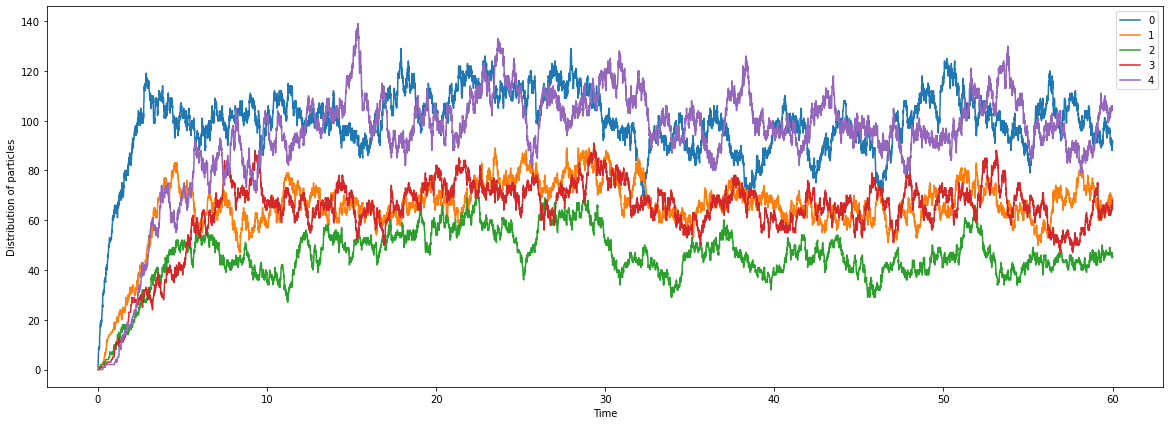

In [84]:
proportional(100)

# b) fixed

In [85]:
def fixed(input_rate):
    # everything is almost the same as before with few exceptions
    time_limit = 60
    eps = 1e-16
    states = []
    times = []
    node_states = np.array([1, 0, 0, 0, 0]) 
    states.append(node_states.copy())
    times.append(0)
    total_time = 0
    total_particles = sum(node_states)
    it = 0
    n_nodes = G.number_of_nodes()
    while total_time<time_limit:

        t_nexts = list(-np.log(np.random.rand(n_nodes))/(np.ones(n_nodes))) # fixed rates
        inp_time = -np.log(np.random.rand())/input_rate

        # prevent selecting node with no particles inside by making their clock infinity
        for i in range(len(node_states)):
            if node_states[i] == 0:
                t_nexts[i] = 10e10
        mov_time = min(t_nexts)


        it += 1
        if inp_time< mov_time:
            total_particles+=1
            node_states[0]+=1
            total_time+=inp_time
            states.append(node_states.copy())
            times.append(total_time)
            continue

        total_time += mov_time
        sel_node = np.argmin(t_nexts) 
        
        if sel_node == 4:
            total_particles -= 1
            node_states[4] -= 1

        else:
            des_node = np.random.choice(G.nodes(), p = P[sel_node, :])

            node_states[sel_node] -=1
            node_states[des_node] +=1

        if total_particles < 0:
            inp_time = -np.log(np.random.rand())/input_rate
            total_particles+=1
            node_states[0]+=1
            total_time+=inp_time
            states.append(node_states.copy())
            times.append(total_time)

        print(total_time, total_particles, node_states)
    fig, ax = plt.subplots(figsize=(20,7)) 
    for node in range(G.number_of_nodes()):
        plt.plot(times, np.array(states)[:,node], label=node)
    ax.legend()
    plt.xlabel('Time')
    plt.ylabel('Distribution of particles')
    plt.legend()
    plt.savefig("plot3fixed_rate"+str(input_rate)+".eps",format='eps')

0.18389332512229342 1 [0 1 0 0 0]
2.0025414426569736 4 [3 0 1 0 0]
2.747688570857229 6 [4 1 1 0 0]
2.820200292792272 6 [3 1 2 0 0]
2.865714356174914 6 [3 1 1 1 0]
2.965006531369233 6 [3 1 1 0 1]
3.030758650697256 6 [3 1 0 1 1]
3.047869929725396 5 [3 1 0 1 0]
3.4046524301444228 5 [3 1 0 0 1]
3.491360549258644 4 [3 1 0 0 0]
3.9657302223006607 4 [2 2 0 0 0]
4.015757405505347 4 [1 2 1 0 0]
4.080044884371964 4 [1 2 0 1 0]
5.707127344831316 5 [2 1 0 1 1]
5.776050597758296 5 [1 2 0 1 1]
5.803991097845182 5 [1 2 0 0 2]
7.094663864679485 6 [2 1 0 0 3]
7.310995732029959 6 [2 0 1 0 3]
7.4711373246493675 6 [1 0 2 0 3]
7.819486767889086 6 [2 0 2 0 2]
9.10473523122654 5 [2 0 2 0 1]
9.819705511987014 5 [1 1 2 0 1]
10.02305526768824 4 [1 1 2 0 0]
10.392401694343693 5 [2 0 2 0 1]
10.57364202296525 4 [2 0 2 0 0]
11.155085759371797 4 [1 1 2 0 0]
11.398657252584098 4 [1 1 1 1 0]
11.644232501185483 4 [1 1 1 0 1]
12.280733806896384 5 [2 0 1 1 1]
12.451070755929635 5 [1 1 1 1 1]
12.649161912604216 5 [1 1 1 0

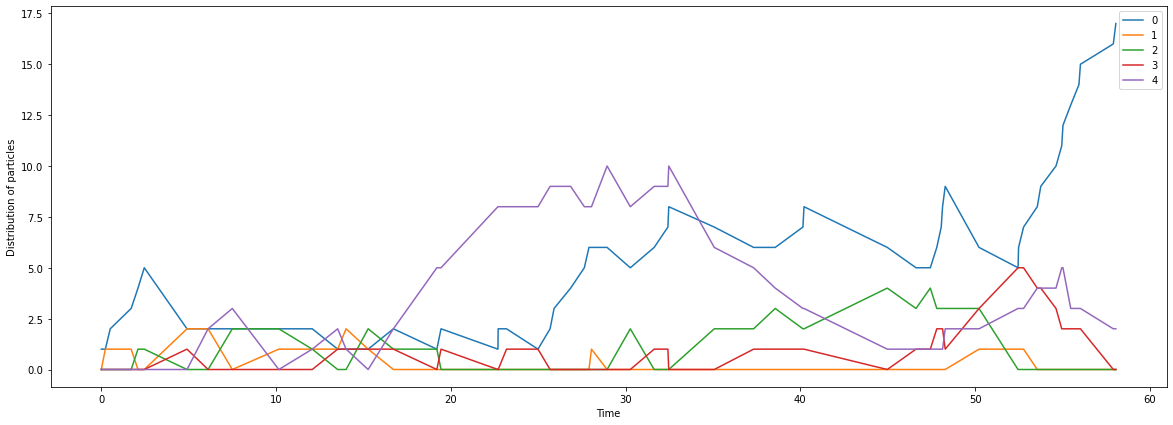

In [80]:
fixed(1)

0.5731461181154682 5 [4 1 0 0 0]
0.713895683137806 5 [3 1 1 0 0]
0.9199387726185899 8 [6 0 2 0 0]
2.0737624701279085 18 [16  0  1  1  0]
2.2220011029570665 19 [17  0  1  0  1]
2.8238212371301668 25 [23  0  0  1  1]
3.1024071026407967 26 [23  1  0  1  1]
3.1131159649051248 26 [22  2  0  1  1]
3.4261766496094754 26 [23  2  0  1  0]
3.539427925830258 27 [24  1  0  1  1]
4.2745749127335 38 [35  1  0  0  2]
4.319343659529279 38 [34  2  0  0  2]
4.7770704970176965 41 [36  3  0  0  2]
5.128441924769715 44 [38  4  0  0  2]
5.2594043036625795 47 [41  3  0  0  3]
6.087723813153092 53 [46  4  0  0  3]
6.291377257219837 54 [48  4  0  0  2]
6.501629625339523 55 [49  3  1  0  2]
6.824701857956079 57 [51  2  2  0  2]
6.913983496967737 56 [51  2  2  0  1]
7.25209570485867 58 [54  2  2  0  0]
7.793960255188259 65 [61  2  1  1  0]
7.948640333266761 67 [62  3  1  1  0]
7.991379629505553 67 [62  3  1  0  1]
8.065579266903962 69 [63  3  2  0  1]
8.11388807711466 69 [63  3  1  1  1]
8.621437346584614 78 [72

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


 530 [505   6   5   0  14]


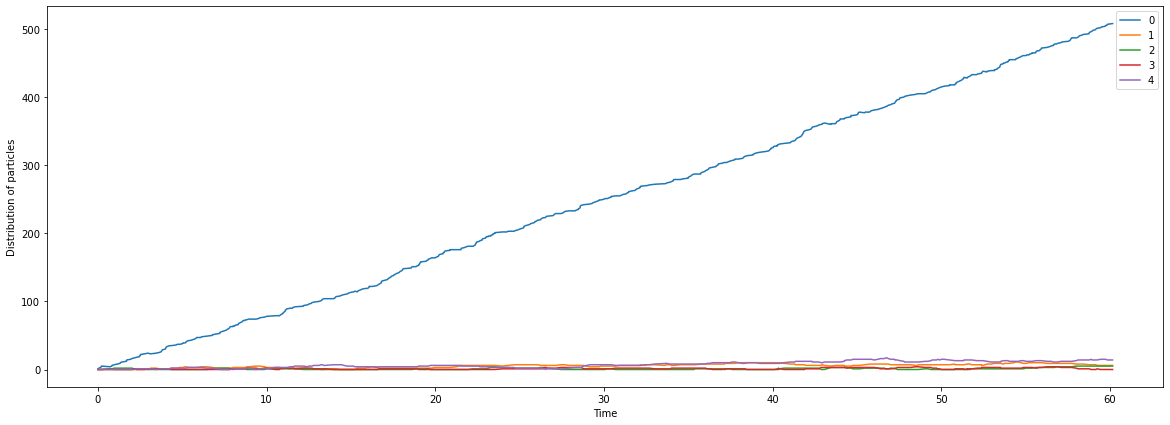

In [68]:
fixed(10)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.88346503904222 1 [0 0 1 0 0]
2.2137391119562575 1 [0 0 0 1 0]
2.572510235530131 1 [0 0 0 0 1]
2.9818618247459288 0 [0 0 0 0 0]
21.082583635576764 1 [0 0 1 0 0]
24.510995721315336 1 [0 0 0 1 0]
24.525399826119337 1 [0 0 0 0 1]
24.739215775296724 0 [0 0 0 0 0]
36.92406662357564 1 [0 0 1 0 0]
37.076778407871515 1 [0 0 0 1 0]
37.421700818941716 1 [0 0 0 0 1]
37.457563443689466 0 [0 0 0 0 0]
42.58515419748143 1 [0 1 0 0 0]
42.68749660458466 1 [0 0 0 0 1]
43.28636222750102 0 [0 0 0 0 0]
50.198024056192786 1 [0 1 0 0 0]
52.40061615986559 1 [0 0 1 0 0]
54.31382033706721 2 [0 0 2 0 0]
55.0727890341638 3 [1 0 1 1 0]
55.328020664785065 3 [1 0 0 2 0]
57.033779020762175 3 [1 0 0 1 1]
57.23299315731259 2 [1 0 0 1 0]
57.285233612645044 2 [1 0 0 0 1]
57.3458051047276 2 [0 1 0 0 1]
57.72868734902301 2 [0 0 0 0 2]
58.20422554768602 1 [0 0 0 0 1]
61.094123425781376 0 [0 0 0 0 0]


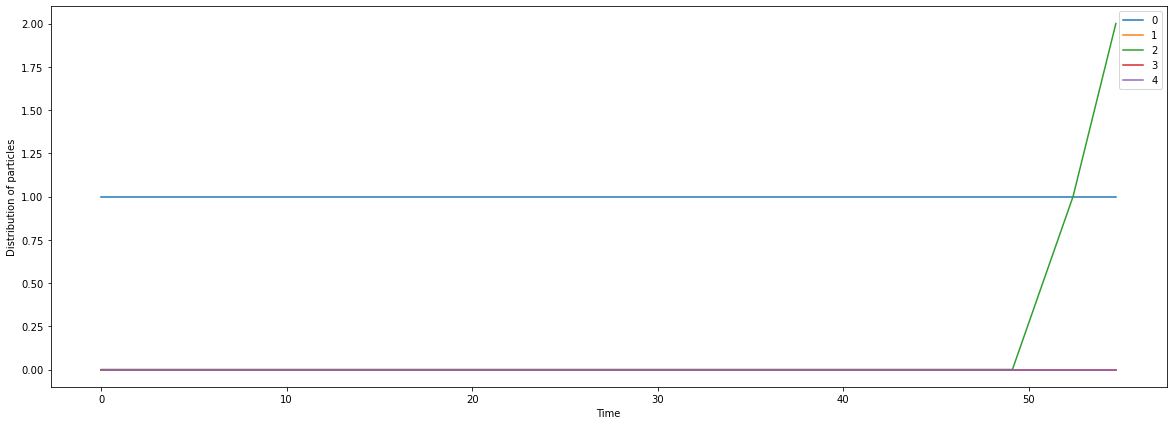

In [86]:
fixed(0.1)